## Project Overview
Real-time 3D pose estimation and semantic analysis system for human movement analysis using multiple synchronized cameras. This project evolved from foundational planning (Meeting 1: Trevor & Jason, ~Sept 5) to implementation refinement (Meeting 2: Trevor, Jason & Henry, ~Sept 6-7, 2025).

### Core Applications:
- **Combat Sports**: Kickboxing analysis (jabs, crosses, hooks, kicks) with multi-person scenarios
- **Dance Performance**: Pose-to-sound mapping for immersive art installations (Wei Dong collaboration)
- **Medical/Recovery**: Gait analysis for concussion recovery tracking
- **Fitness**: Kettlebell exercise form analysis and technique correction
- **General Motion Capture**: Extensible framework for various movement analysis scenarios

**Demo Target**: September 24, 2025 in San Francisco with Wei Dong (Kineve/Kinetech Arts)

## Project Evolution & Meeting Insights

### Meeting 1 (Foundational Architecture, ~2 hours)
**Participants**: Trevor Conger (intern/student) & Jason (mentor/lead with IoT/sensors background)
**Focus**: Deep-dive architectural planning with educational emphasis
- Established pipeline blueprint: Capture → Normalize → Fuse → Model → Semantics
- Defined real-time as SLA (Service Level Agreement) with emergency response analogies
- Explored graph-based approach with explicit edges (wrist-elbow connections)
- Emphasized mentorship and foundational understanding

### Meeting 2 (Implementation Pivot, ~30-60 mins with tech issues)
**Participants**: Trevor, Jason & Henry (Trevor's classmate, 3D modeling expertise)
**Focus**: Tactical implementation with collaborative problem-solving
- **Key Shift**: From graph-based to point cloud approach (no explicit edges)
- Introduced OFF format and ModelNet integration strategy
- Added Henry's 3D mesh experience (Minecraft replicas, mesh simplification)
- Refined tools and setup procedures

## Technical Architecture

### 1. Input Capture & Synchronization
- **Hardware**: 3 synchronized cameras (Raspberry Pi cameras: 640x480, 240 FPS)
- **Synchronization Method**: Hollywood-style light-flash technique (hacky but effective)
- **Processing**: MediaPipe for pose estimation
  - Outputs 33 keypoints per frame per camera
  - Each keypoint has XYZ coordinates (99 columns total: 33 × 3)
  - Confidence scores available but ignored initially
- **Data Source**: KB_snatch_Sept5_prim folder (3 Parquet/CSV files from kettlebell footage)

### 2. Data Pipeline & Storage
- **Input Format**: CSV/Parquet files (3 files per session, one per camera)
- **Data Structure**: High frame rate (240 FPS) provides density; can downsample to 30 FPS
- **Database**: KDB (column-based time series with in-memory capabilities)
- **File Management**: GitHub for code, DVC for data versioning, UV for package management

### 3. Normalization & Fusion Strategy
- **Reference Frame**: MediaPipe provides world coordinates (standard reference frame)
- **Fusion Method**: For each frame and keypoint, combine XYZ from all 3 cameras
  - Creates triangular mesh or point set per keypoint
  - Results in sparse point cloud per frame (99 points total)
- **Alternative Approach**: Point cloud concatenation without explicit edge collapse

### 4. Data Transformation for ML
- **Target Format**: OFF (Object File Format) for compatibility with ModelNet
- **OFF Structure**:
  - Header: "OFF"
  - Counts: vertices (99), faces, edges (0)
  - Vertex list: XYZ coordinates per line
  - Face list: Triangles defined by 3-camera views per keypoint
- **Implementation**: Hack ModelNet class to use local OFF files instead of downloads

### 5. Machine Learning Framework
- **Primary Framework**: PyTorch Geometric
- **Model Architecture**: PointNet/PointNet++ for point cloud processing
  - **Evolution**: Shifted from graph-based (Meeting 1) to point cloud focus (Meeting 2)
  - Handles sparse point clouds without explicit edges
  - Uses distance functions for associations instead of predefined connections
- **Reference Implementation**: Weights & Biases PointNet example for architecture guidance
- **Data Classes**: Data/TemporalData for graph representation
- **Logging**: MLflow (preferred over Weights & Biases for cost/market relevance)
- **Scaling**: PyTorch Geometric auto-scales to multi-GPU (PaperSpace for cloud development)

### 6. Real-Time Processing Definition
- **Real-Time = SLA**: Service Level Agreement guaranteeing response within time window
- **Not**: Ultra-low latency, but predictable throughput
- **Target**: Based on input volume and processing needs
- **Hardware Scaling**: PyTorch Geometric auto-scales to multi-GPU

## Current Implementation Status

### Completed/Defined:
- ✅ Overall architecture and data flow
- ✅ Hardware selection and synchronization method  
- ✅ Data format specifications (CSV/Parquet → OFF)
- ✅ ML framework selection (PyTorch Geometric + PointNet)
- ✅ Database choice (KDB) and tooling (UV, GitHub, DVC)

### In Progress:
- 🔄 Data transformation pipeline (CSV/Parquet → OFF format)
- 🔄 ModelNet class modification for local file processing
- 🔄 Environment setup and repository structure

### Next Steps:
1. **Trevor/Henry Tasks**:
   - Process 3 Parquet/CSV files from KB_snatch_Sept5_prim folder
   - Implement CSV → OFF transformation
   - Research CLI tools (MeshLab) for format conversion
   - Setup development environment (UV, GitHub repo)
   - Study PointNet papers and PyTorch Geometric documentation

2. **Technical Validation**:
   - Test sparse mesh → point cloud conversion
   - Validate temporal encoding (single vs. multi-frame OFF)
   - Address sparsity challenges (99 points vs. typical 10k+ point clouds)

## Key Technical Challenges & Solutions

### Critical Issues Identified:
- **Sparsity Challenge**: Only 99 points/frame vs. typical dense point clouds (10k+)
  - *Risk*: PointNet may struggle with sparse data
  - *Solution*: Group frames for density (downsample 240→30 FPS for denser clouds)
  
- **Temporal Encoding**: Multi-frame sequences and TemporalData integration
  - *Question*: Single OFF file per frame vs. multi-frame encoding
  - *Approach*: Test TemporalData class for sequence handling
  
- **Fusion Accuracy**: Camera displacement creates "weak" triangular meshes
  - *Henry's Proposal*: Average XYZ coordinates across cameras per keypoint
  - *Status*: Deferred until baseline implementation works
  
- **Data Volume**: High frame rate (240 FPS) processing pressure
  - *Solutions*: Efficient batching, data loaders, modern hardware scaling

### Implementation Strategies:
- **"Straight Path First"**: Get basic pipeline working before optimization
- **Prototype-Driven**: End-to-end functionality over perfection
- **Collaborative Debugging**: Leverage team's diverse expertise
- **Hardware Scaling**: Local development → GPU cloud scaling (PaperSpace)

## Team Structure & Collaboration Dynamics

### Core Team:
- **Trevor Conger**: Data transformation implementation (intern/student, passionate collaborator)
- **Jason (Speaker 1)**: Hardware/IoT integration, project mentorship (background: healthcare simulations, Spark/MLpack)
- **Henry**: 3D modeling and ML aspects (Trevor's classmate, mesh expertise from Minecraft replicas)
- **Wei Dong**: External collaboration partner (Kineve/Kinetech Arts, dance/performance focus)

### Collaboration Evolution:
- **Meeting 1**: Mentor-student dynamic (Jason's educational approach, 2-hour deep dive)
- **Meeting 2**: Collaborative problem-solving (Henry's fresh perspective, practical questions)
- **Key Insight**: "Collaboration as energy source" - Wei's involvement sparked project restart

## Project Philosophy & Context

### Core Principles:
- **Prototype-First**: End-to-end functionality over perfection ("straight path first")
- **Collaborative Energy**: Team motivation essential (solo work draining, all-nighters unsustainable)
- **Accessible Technology**: Low-cost hardware (Raspberry Pi) for broader adoption
- **Modular Architecture**: Ingest → Fuse → Model → Semantics pipeline
- **Educational Value**: Learning through implementation (Trevor's PointNet paper reading assignments)

### Ethical Considerations:
- **Contrast with AI-Generated Work**: Trevor's discomfort with fully AI-generated projects (Gerard's ethics tool)
- **Hands-On Approach**: Emphasis on understanding and building rather than automated generation
- **Real-World Applications**: Focus on meaningful use cases (medical recovery, performance art)

### Broader Context:
- **Historical Connections**: Jason's background with Spark early days, MLpack collaborations
- **Industry Relevance**: Dance/performance art integration, medical applications, sports analysis
- **Timeline Pressure**: Demo deadline creates focused urgency while maintaining learning goals


In [9]:
from IPython.display import Video

Video("example.mp4")

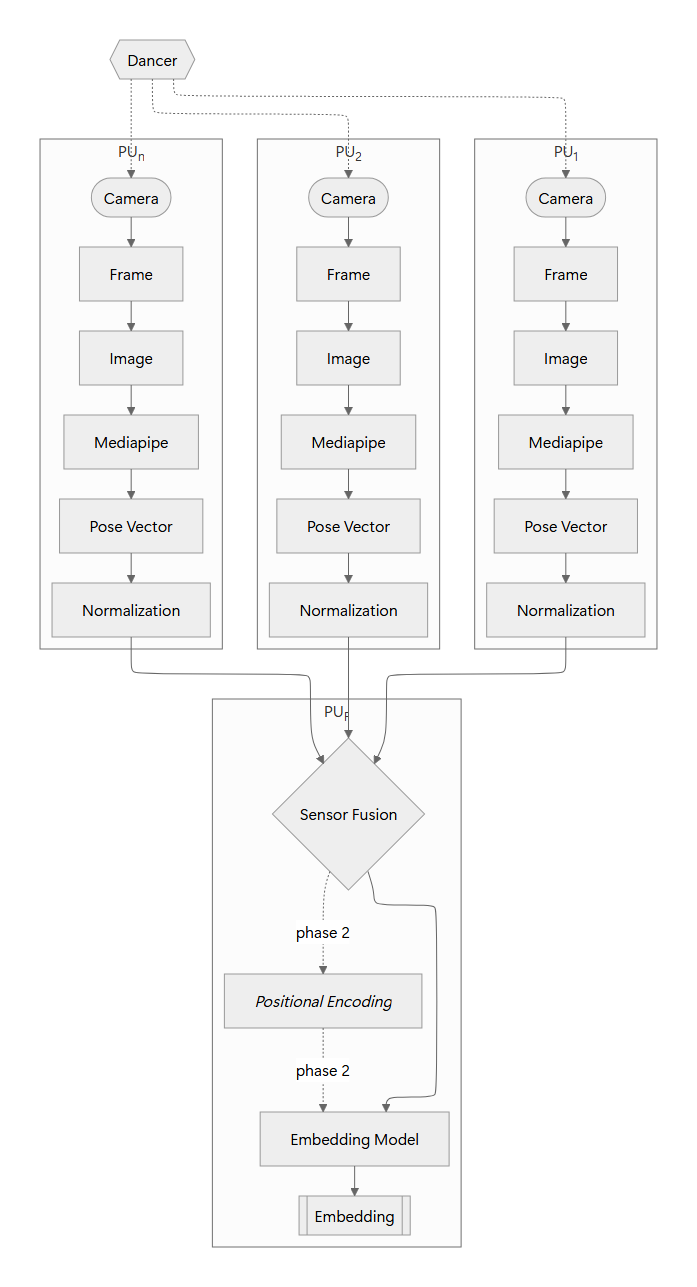

In [15]:
from IPython.display import Image
Image(filename='image1.png')

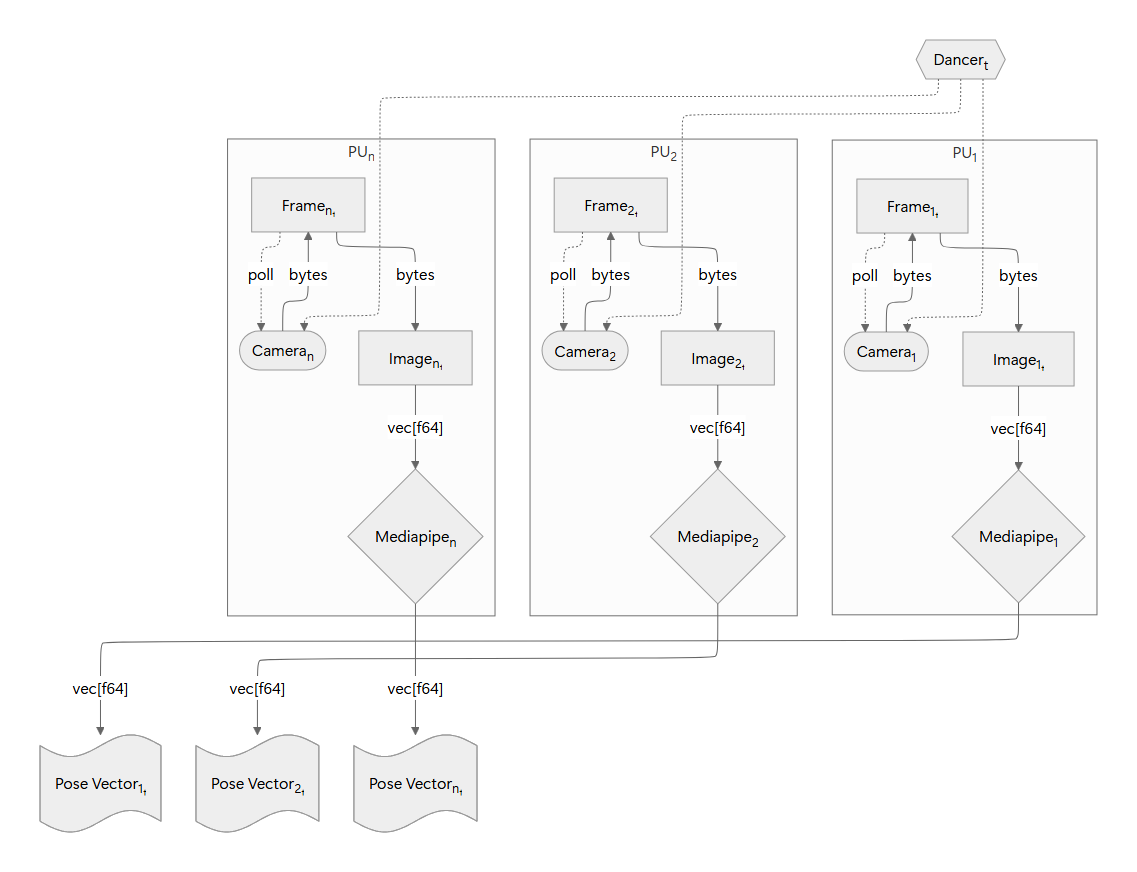

In [ ]:
from IPython.display import Image
Image(filename='image2.png')

### 1.1. Frame Capture

- Poll hardware video source for frame data at `?Hz`
- *Should have its own thread*

### 1.2. Convert Bytes to Image Vector

- Convert bytes from polling to a `YUYV?` image vector
- *Should be done in separate thread*

### 1.3. Stream image vector into Mediapipe

- Provide `YUYV?` vectors as input into Mediapipe
- *Investigate Mediapipe's support for streaming inputs*

### 1.4. Generate Pose Vectors

- Use Mediapipe to extract Pose Vector from image vector
- *Determine where it makes sense to forward output*

### 2. Normalization → Embedding

*Use data files and virtualization for development.*

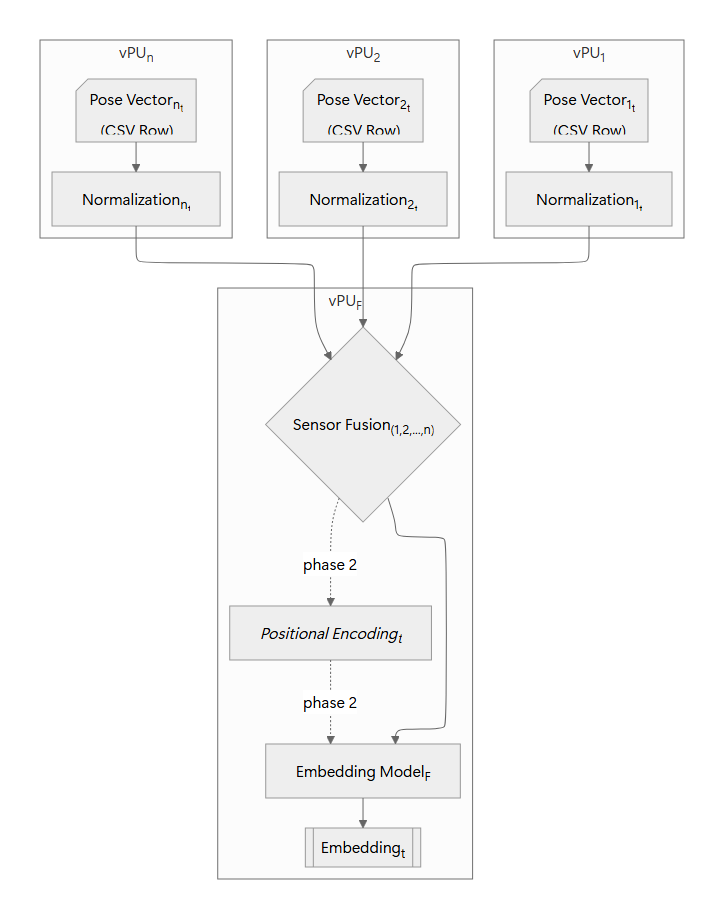

In [16]:
from IPython.display import Image
Image(filename='image3.png')

*Note:* Pose Vectors read from data files are structured identically to the output in Section 1.

### 2.1. Normalization

- Standardize point coordinates
- *Ask Wei about his method*

### 2.2. Sensor Fusion

- Coalesce all normalized data sources for time window $\left[t_{n-m}, t_n\right]$

### 2.3. Embeddings Model → Embedding

- Input "fused" data into GNN(?-first take, anyway) model to generate embedding

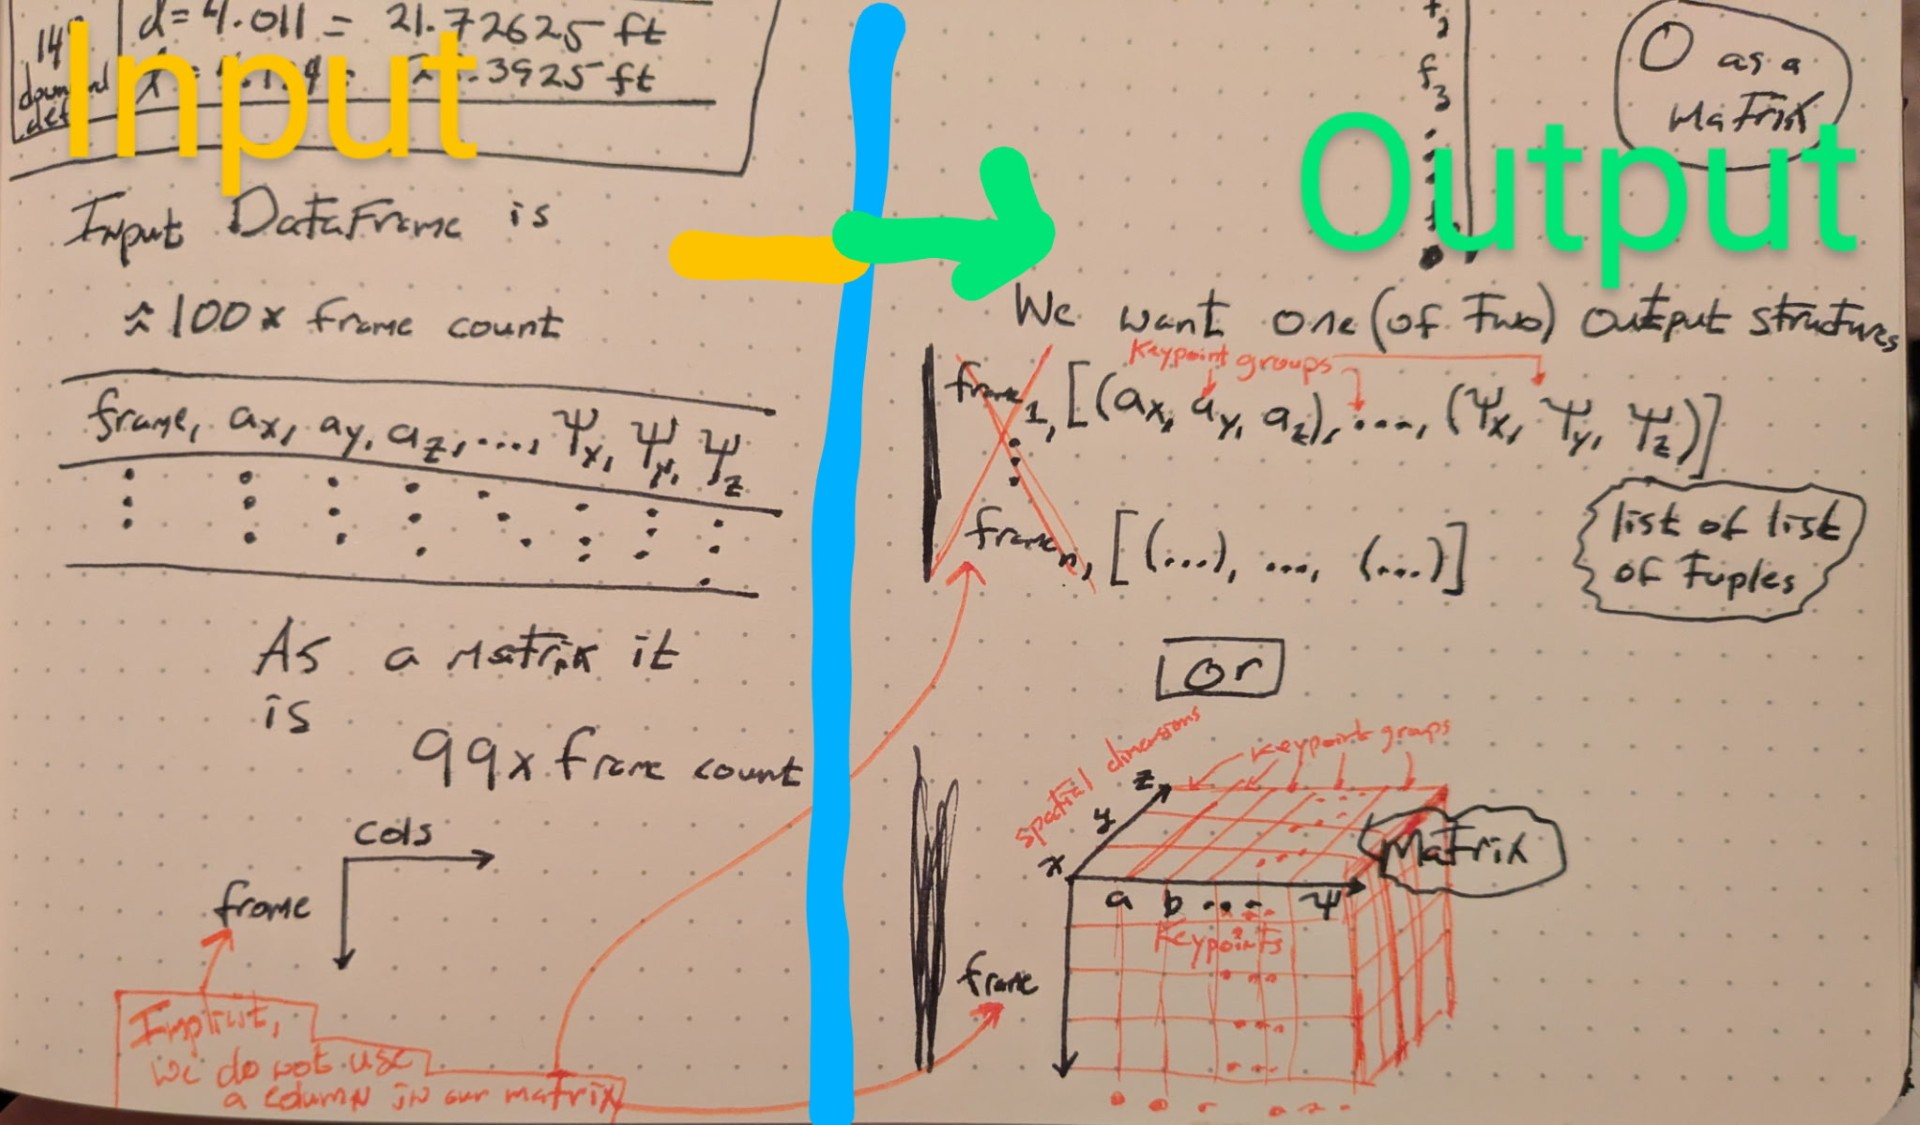

In [17]:
from IPython.display import Image
Image(filename='image4.png')

1. Document how we expect the `(n, m)` matrix to be constructed. Will be something like
`m' is frame number
`n` must be modulo 3
If there are 3 `(x, y, z)` pairs for each frame, and 1200 frames, we expect a `(9, 1200)` matrix of the following vertical layout

ax, bx, cx, ay, by, cy, az, bz, cz

2. create a PyTorch Geometric ModelNet' dataset for the `(n, m)` matrix that enforces the documented constraints (has a method to create a point cloud)

https://wandb.ai/geekyrakshit/pyg-point-cloud/reports/Point-Cloud-Classification-using-PyTorch-Geometric--VmlldzozMTExMTE3



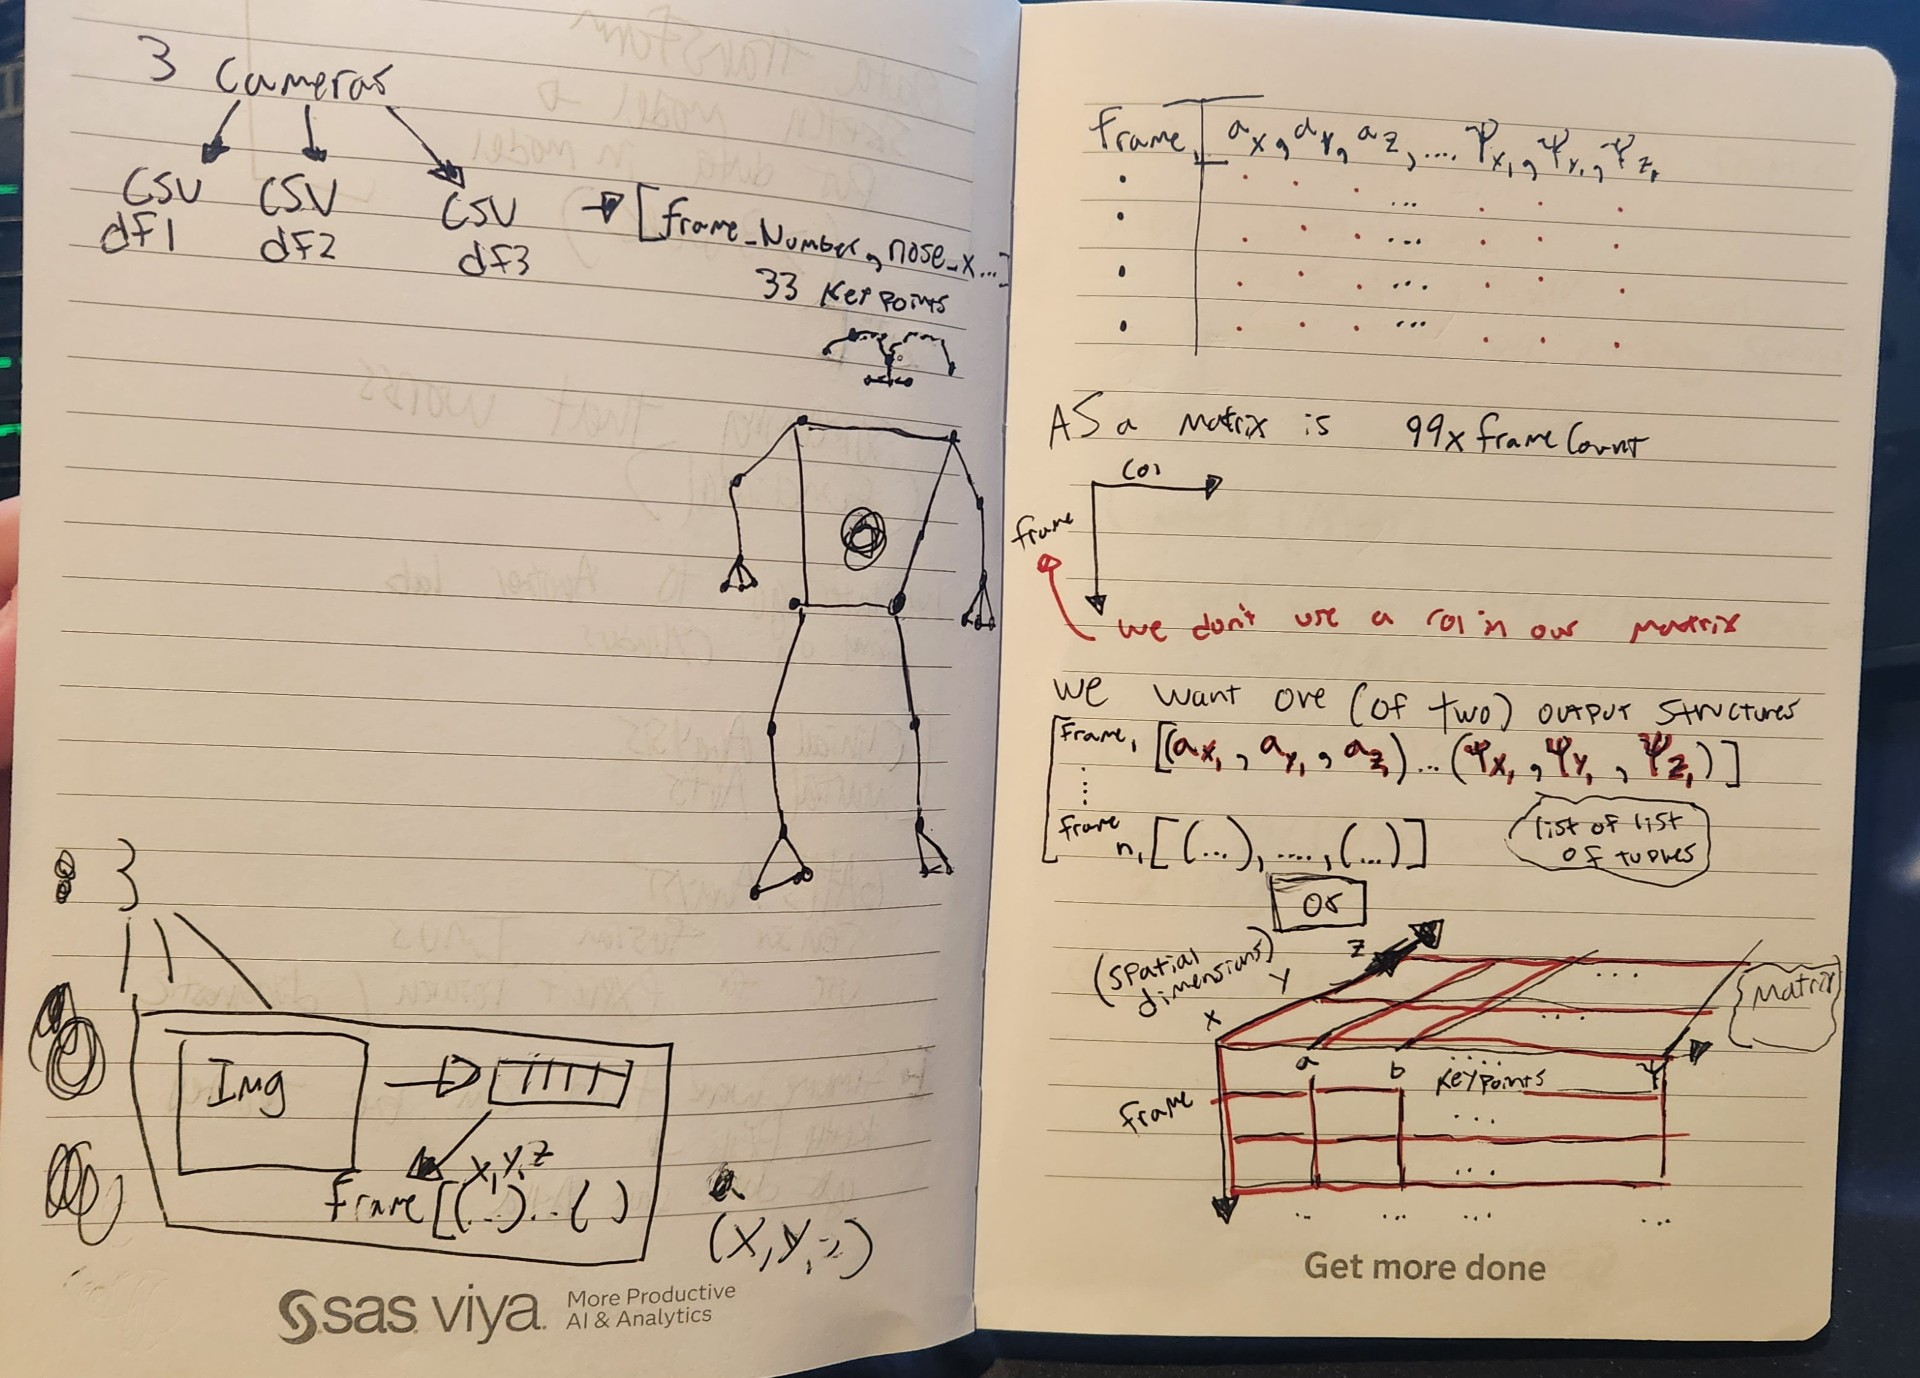

In [18]:
from IPython.display import Image
Image(filename='image5.png')

Merge Data frames (Union)
Melt 

GATE Analysis
Sensor fusion IMUs
use for explicit research / diagnostic



{DataFrame[timestamp: double, frame_number: int, nose_x: double, nose_y: double, left_eye_inner_x: double, left_eye_inner_y: double, left_eye_x: double, left_eye_y: double, left_eye_outer_x: double, left_eye_outer_y: double, right_eye_inner_x: double, right_eye_inner_y: double, right_eye_x: double, right_eye_y: double, right_eye_outer_x: double, right_eye_outer_y: double, left_ear_x: double, left_ear_y: double, right_ear_x: double, right_ear_y: double, mouth_left_x: double, mouth_left_y: double, mouth_right_x: double, mouth_right_y: double, left_shoulder_x: double, left_shoulder_y: double, right_shoulder_x: double, right_shoulder_y: double, left_elbow_x: double, left_elbow_y: double, right_elbow_x: double, right_elbow_y: double, left_wrist_x: double, left_wrist_y: double, right_wrist_x: double, right_wrist_y: double, left_pinky_x: double, left_pinky_y: double, right_pinky_x: double, right_pinky_y: double, left_index_x: double, left_index_y: double, right_index_x: double, right_index_y: double, left_thumb_x: double, left_thumb_y: double, right_thumb_x: double, right_thumb_y: double, left_hip_x: double, left_hip_y: double, right_hip_x: double, right_hip_y: double, left_knee_x: double, left_knee_y: double, right_knee_x: double, right_knee_y: double, left_ankle_x: double, left_ankle_y: double, right_ankle_x: double, right_ankle_y: double, left_heel_x: double, left_heel_y: double, right_heel_x: double, right_heel_y: double, left_foot_index_x: double, left_foot_index_y: double, right_foot_index_x: double, right_foot_index_y: double, nose_z: double, left_eye_inner_z: double, left_eye_z: double, left_eye_outer_z: double, right_eye_inner_z: double, right_eye_z: double, right_eye_outer_z: double, left_ear_z: double, right_ear_z: double, mouth_left_z: double, mouth_right_z: double, left_shoulder_z: double, right_shoulder_z: double, left_elbow_z: double, right_elbow_z: double, left_wrist_z: double, right_wrist_z: double, left_pinky_z: double, right_pinky_z: double, left_index_z: double, right_index_z: double, left_thumb_z: double, right_thumb_z: double, left_hip_z: double, right_hip_z: double, left_knee_z: double, right_knee_z: double, left_ankle_z: double, right_ankle_z: double, left_heel_z: double, right_heel_z: double, left_foot_index_z: double, right_foot_index_z: double, nose_confidence: double, left_eye_inner_confidence: double, left_eye_confidence: double, left_eye_outer_confidence: double, right_eye_inner_confidence: double, right_eye_confidence: double, right_eye_outer_confidence: double, left_ear_confidence: double, right_ear_confidence: double, mouth_left_confidence: double, mouth_right_confidence: double, left_shoulder_confidence: double, right_shoulder_confidence: double, left_elbow_confidence: double, right_elbow_confidence: double, left_wrist_confidence: double, right_wrist_confidence: double, left_pinky_confidence: double, right_pinky_confidence: double, left_index_confidence: double, right_index_confidence: double, left_thumb_confidence: double, right_thumb_confidence: double, left_hip_confidence: double, right_hip_confidence: double, left_knee_confidence: double, right_knee_confidence: double, left_ankle_confidence: double, right_ankle_confidence: double, left_heel_confidence: double, right_heel_confidence: double, left_foot_index_confidence: double, right_foot_index_confidence: double]} 


camera 1 { 
    timestamp: 0.025 frame_number: 6 nose_x: 68.3678126335144 nose_y: 771.7561340332031 left_eye_inner_x: 49.80858385562897 left_eye_inner_y: 771.8613433837891 left_eye_x: 49.07913029193878 left_eye_y: 774.2633056640625 left_eye_outer_x: 49.014655351638794 left_eye_outer_y: 775.8229064941406 right_eye_inner_x: 51.97575509548187 right_eye_inner_y: 794.7881317138672 right_eye_x: 52.730780839920044 right_eye_y: 788.3673858642578 right_eye_outer_x: 49.22402858734131 right_eye_outer_y: 774.0110015869141 left_ear_x: 5.606368705630302 left_ear_y: 726.0617065429688 right_ear_x: 40.873381197452545 right_ear_y: 676.4820861816406 mouth_left_x: 52.82827377319336 mouth_left_y: 752.4546813964844 mouth_right_x: 58.57908010482788 mouth_right_y: 709.0209197998047 left_shoulder_x: 40.377384424209595 left_shoulder_y: 643.7551116943359 right_shoulder_x: 86.04233622550964 right_shoulder_y: 614.2242813110352 left_elbow_x: 140.9135091304779 left_elbow_y: 883.4111785888672 right_elbow_x: 177.21932172775269 right_elbow_y: 628.8574600219727 left_wrist_x: 116.18963599205017 left_wrist_y: 1020.2733612060547 right_wrist_x: 197.91932344436646 right_wrist_y: 765.8113098144531 left_pinky_x: 114.91903066635132 left_pinky_y: 1052.9032135009766 right_pinky_x: 177.57359862327576 right_pinky_y: 814.2198944091797 left_index_x: 100.25466442108154 left_index_y: 1007.2130584716797 right_index_x: 146.61356806755066 right_index_y: 864.1433715820312 left_thumb_x: 99.98507022857666 left_thumb_y: 985.9284210205078 right_thumb_x: 189.81070518493652 right_thumb_y: 794.4499206542969 left_hip_x: -0.5537267541512847 left_hip_y: 21.155354976654053 right_hip_x: -1.0230361763387918 right_hip_y: -15.443834066390991 left_knee_x: 146.338073015213 left_knee_y: 266.0292434692383 right_knee_x: 174.75679636001587 right_knee_y: 162.0528221130371 left_ankle_x: 211.54417276382446 left_ankle_y: 647.4687957763672 right_ankle_x: 162.88305401802063 right_ankle_y: 265.0583267211914 left_heel_x: 226.16317749023438 left_heel_y: 693.4764862060547 right_heel_x: 163.13802480697632 right_heel_y: 299.61761474609375 left_foot_index_x: 247.5058150291443 left_foot_index_y: 873.2765960693359 right_foot_index_x: 134.7894787788391 right_foot_index_y: 429.9137878417969 nose_z: -0.09539863467216492 left_eye_inner_z: -0.10527295619249344 left_eye_z: -0.0947764590382576 left_eye_outer_z: -0.09579650312662125 right_eye_inner_z: -0.10002391785383224 right_eye_z: -0.10908232629299164 right_eye_outer_z: -0.08832661807537079 left_ear_z: -0.07969225943088531 right_ear_z: 0.00838268082588911 mouth_left_z: -0.07693907618522644 mouth_right_z: -0.08088530600070953 left_shoulder_z: -0.052443187683820724 right_shoulder_z: 0.18193386495113373 left_elbow_z: -0.060497939586639404 right_elbow_z: 0.18698999285697937 left_wrist_z: 0.1131618469953537 right_wrist_z: 0.17937108874320984 left_pinky_z: 0.13143017888069153 right_pinky_z: 0.1496456265449524 left_index_z: 0.12568435072898865 right_index_z: 0.13914063572883606 left_thumb_z: 0.11386138200759888 right_thumb_z: 0.16915957629680634 left_hip_z: -0.05812309682369232 right_hip_z: 0.05985090509057045 left_knee_z: -0.011996794492006302 right_knee_z: 0.1418405920267105 left_ankle_z: -0.002113732974976301 right_ankle_z: 0.08799958974123001 left_heel_z: 0.0028031431138515472 right_heel_z: 0.04379330947995186 left_foot_index_z: 0.015542191453278065 right_foot_index_z: 0.048318155109882355 nose_confidence: 0.9997665882110596 left_eye_inner_confidence: 0.9997410774230957 left_eye_confidence: 0.9996533989906311 left_eye_outer_confidence: 0.9997523427009583 right_eye_inner_confidence: 0.9998424649238586 right_eye_confidence: 0.9998123049736023 right_eye_outer_confidence: 0.9998730421066284 left_ear_confidence: 0.9995071291923523 right_ear_confidence: 0.9993898272514343 mouth_left_confidence: 0.9981886148452759 mouth_right_confidence: 0.9983221292495728 left_shoulder_confidence: 0.9993533492088318 right_shoulder_confidence: 0.9984531998634338 left_elbow_confidence: 0.3380269408226013 right_elbow_confidence: 0.040409836918115616 left_wrist_confidence: 0.2879771292209625 right_wrist_confidence: 0.04092320427298546 left_pinky_confidence: 0.3006911277770996 right_pinky_confidence: 0.059988632798194885 left_index_confidence: 0.2917670011520386 right_index_confidence: 0.05862948298454285 left_thumb_confidence: 0.26595643162727356 right_thumb_confidence: 0.058093633502721786 left_hip_confidence: 0.9990665912628174 right_hip_confidence: 0.9994282126426697 left_knee_confidence: 0.4770704507827759 right_knee_confidence: 0.06076608598232269 left_ankle_confidence: 0.18779808282852173 right_ankle_confidence: 0.06875785440206528 left_heel_confidence: 0.2432369440793991 right_heel_confidence: 0.12004207074642181 left_foot_index_confidence: 0.2561873495578766 right_foot_index_confidence: 0.09822401404380798
    } 
    
    Camera 2 
    { timestamp: 0.025 frame_number: 6 nose_x: 17.189041078090668 nose_y: 523.475456237793 left_eye_inner_x: 27.30710059404373 left_eye_inner_y: 532.2700119018555 left_eye_x: 25.431914627552032 left_eye_y: 532.4946975708008 left_eye_outer_x: 25.52462786436081 left_eye_outer_y: 537.0161437988281 right_eye_inner_x: 11.65173590183258 right_eye_inner_y: 554.4437408447266 right_eye_x: 11.154005080461502 right_eye_y: 551.5169906616211 right_eye_outer_x: 5.404316894710064 right_eye_outer_y: 539.6467208862305 left_ear_x: 60.94933748245239 left_ear_y: 482.6679992675781 right_ear_x: -3.2108160853385925 right_ear_y: 436.50367736816406 mouth_left_x: 28.059771358966827 mouth_left_y: 504.9552917480469 mouth_right_x: 2.4672313034534454 mouth_right_y: 465.59715270996094 left_shoulder_x: 99.44946527481079 left_shoulder_y: 317.2030448913574 right_shoulder_x: -30.95588654279709 right_shoulder_y: 426.6159439086914 left_elbow_x: 103.22326898574829 left_elbow_y: 408.9649200439453 right_elbow_x: -132.8661847114563 right_elbow_y: 392.0186233520508 left_wrist_x: 14.854989498853683 left_wrist_y: 411.38805389404297 right_wrist_x: -162.37947463989258 right_wrist_y: 566.0616302490234 left_pinky_x: 13.482281863689423 left_pinky_y: 429.8414611816406 right_pinky_x: -176.22276306152344 right_pinky_y: 638.5114288330078 left_index_x: 6.849087774753571 left_index_y: 342.5343704223633 right_index_x: -176.19248628616333 right_index_y: 617.4463272094727 left_thumb_x: -4.21484000980854 left_thumb_y: 361.97437286376953 right_thumb_x: -152.67999529838562 right_thumb_y: 570.3197860717773 left_hip_x: 28.446473479270935 left_hip_y: -3.0640488862991333 right_hip_x: -29.693888425827026 right_hip_y: 12.444287538528442 left_knee_x: 41.40698254108429 left_knee_y: 95.29191970825195 right_knee_x: -195.80981969833374 right_knee_y: 151.56270027160645 left_ankle_x: 92.96676993370056 left_ankle_y: 751.1888885498047 right_ankle_x: -177.1268606185913 right_ankle_y: 533.6594772338867 left_heel_x: 109.89869713783264 left_heel_y: 821.4054870605469 right_heel_x: -171.25643849372864 right_heel_y: 595.3939819335938 left_foot_index_x: 149.3367612361908 left_foot_index_y: 1019.2043304443359 right_foot_index_x: -160.29750108718872 right_foot_index_y: 828.9998626708984 nose_z: 0.18241271376609802 left_eye_inner_z: 0.16915500164031982 left_eye_z: 0.18315552175045013 left_eye_outer_z: 0.17747944593429565 right_eye_inner_z: 0.1521371603012085 right_eye_z: 0.14274822175502777 right_eye_outer_z: 0.1617288440465927 left_ear_z: 0.1399264633655548 right_ear_z: 0.11413700878620148 mouth_left_z: 0.18255770206451416 mouth_right_z: 0.14381630718708038 left_shoulder_z: 0.13749103248119354 right_shoulder_z: 0.19594480097293854 left_elbow_z: 0.10506179928779602 right_elbow_z: 0.15286904573440552 left_wrist_z: 0.21979385614395142 right_wrist_z: 0.1431480199098587 left_pinky_z: 0.24204613268375397 right_pinky_z: 0.10800889879465103 left_index_z: 0.23527085781097412 right_index_z: 0.10831011831760406 left_thumb_z: 0.23039361834526062 right_thumb_z: 0.13490943610668182 left_hip_z: 0.012807486578822136 right_hip_z: -0.011501641012728214 left_knee_z: -0.030309632420539856 right_knee_z: -0.06151769682765007 left_ankle_z: 0.023613596335053444 right_ankle_z: -0.13049918413162231 left_heel_z: 0.04475143924355507 right_heel_z: -0.17797496914863586 left_foot_index_z: 0.09343139082193375 right_foot_index_z: -0.23129698634147644 nose_confidence: 0.997758150100708 left_eye_inner_confidence: 0.997223436832428 left_eye_confidence: 0.9976646900177002 left_eye_outer_confidence: 0.9979017376899719 right_eye_inner_confidence: 0.997393786907196 right_eye_confidence: 0.9980374574661255 right_eye_outer_confidence: 0.9978727102279663 left_ear_confidence: 0.998963475227356 right_ear_confidence: 0.993760347366333 mouth_left_confidence: 0.996275007724762 mouth_right_confidence: 0.9953333735466003 left_shoulder_confidence: 0.9999858140945435 right_shoulder_confidence: 0.9999132752418518 left_elbow_confidence: 0.08385717868804932 right_elbow_confidence: 0.08405672758817673 left_wrist_confidence: 0.33514639735221863 right_wrist_confidence: 0.46514666080474854 left_pinky_confidence: 0.4217582941055298 right_pinky_confidence: 0.5686357617378235 left_index_confidence: 0.40755215287208557 right_index_confidence: 0.5382993221282959 left_thumb_confidence: 0.37595489621162415 right_thumb_confidence: 0.44971421360969543 left_hip_confidence: 0.9998878836631775 right_hip_confidence: 0.9998161792755127 left_knee_confidence: 0.7652487754821777 right_knee_confidence: 0.5388615727424622 left_ankle_confidence: 0.4179033935070038 right_ankle_confidence: 0.6849098205566406 left_heel_confidence: 0.5775037407875061 right_heel_confidence: 0.7971446514129639 left_foot_index_confidence: 0.3996777832508087 right_foot_index_confidence: 0.745802104473114
    } 
    
    Camera 3 { 
        timestamp: 0.025 frame_number: 6 nose_x: 152.3781180381775 nose_y: -50.27088642120361 left_eye_inner_x: 157.96162962913513 left_eye_inner_y: -102.96566963195801 left_eye_x: 156.4671242237091 left_eye_y: -93.75036239624023 left_eye_outer_x: 154.69284296035767 left_eye_outer_y: -98.46893310546875 right_eye_inner_x: 139.64880466461182 right_eye_inner_y: -84.68339920043945 right_eye_x: 143.37555170059204 right_eye_y: -82.67467498779297 right_eye_outer_x: 141.6284143924713 right_eye_outer_y: -70.3195333480835 left_ear_x: 144.25373911857605 left_ear_y: -159.7610569000244 right_ear_x: 21.721790581941605 right_ear_y: -60.1246976852417 mouth_left_x: 158.12564134597778 mouth_left_y: -52.67288684844971 mouth_right_x: 123.56797456741333 mouth_right_y: -1.5636201202869415 left_shoulder_x: 143.09649467468262 left_shoulder_y: -166.4474868774414 right_shoulder_x: -12.487402260303497 right_shoulder_y: -78.91276359558105 left_elbow_x: 187.49070167541504 left_elbow_y: 139.8305320739746 right_elbow_x: -15.992230027914047 right_elbow_y: 296.9717216491699 left_wrist_x: 185.6282615661621 left_wrist_y: 481.09832763671875 right_wrist_x: 33.00009459257126 right_wrist_y: 557.1240234375 left_pinky_x: 192.9731798171997 left_pinky_y: 491.4798355102539 right_pinky_x: 56.55770301818848 right_pinky_y: 613.3114242553711 left_index_x: 169.53900933265686 left_index_y: 498.7771987915039 right_index_x: 111.19849562644958 right_index_y: 560.4179000854492 left_thumb_x: 172.65162706375122 left_thumb_y: 523.7197494506836 right_thumb_x: 53.222370743751526 right_thumb_y: 554.4563674926758 left_hip_x: 49.21483933925629 left_hip_y: -32.62170076370239 right_hip_x: -46.51466488838196 right_hip_y: 26.59696102142334 left_knee_x: 208.84447574615479 left_knee_y: 365.7989501953125 right_knee_x: -9.103401973843575 right_knee_y: 454.11571502685547 left_ankle_x: 190.06961345672607 left_ankle_y: 546.3215255737305 right_ankle_x: -35.086096823215485 right_ankle_y: 851.1428833007812 left_heel_x: 182.381329536438 left_heel_y: 545.7179260253906 right_heel_x: -28.677805960178375 right_heel_y: 882.7207946777344 left_foot_index_x: 237.23209619522095 left_foot_index_y: 562.9353332519531 right_foot_index_x: -2.1504257060587406 right_foot_index_y: 897.7763366699219 nose_z: -0.7182881832122803 left_eye_inner_z: -0.7160165905952454 left_eye_z: -0.7009137868881226 left_eye_outer_z: -0.7064890265464783 right_eye_inner_z: -0.7439394593238831 right_eye_z: -0.7644046545028687 right_eye_outer_z: -0.7368747591972351 left_ear_z: -0.5949202179908752 right_ear_z: -0.6954218745231628 mouth_left_z: -0.6557056307792664 mouth_right_z: -0.7142379283905029 left_shoulder_z: -0.4298110902309418 right_shoulder_z: -0.44710609316825867 left_elbow_z: -0.4038544297218323 right_elbow_z: -0.5037503242492676 left_wrist_z: -0.3768630623817444 right_wrist_z: -0.5433059334754944 left_pinky_z: -0.38796383142471313 right_pinky_z: -0.6388300061225891 left_index_z: -0.40018337965011597 right_index_z: -0.656666100025177 left_thumb_z: -0.38100457191467285 right_thumb_z: -0.5736724734306335 left_hip_z: 0.05503029003739357 right_hip_z: -0.05420154333114624 left_knee_z: 0.13082580268383026 right_knee_z: 0.027864888310432434 left_ankle_z: 0.3573182225227356 right_ankle_z: 0.22785425186157227 left_heel_z: 0.3959289491176605 right_heel_z: 0.21493512392044067 left_foot_index_z: 0.3728058338165283 right_foot_index_z: 0.1506967693567276 nose_confidence: 0.9933682680130005 left_eye_inner_confidence: 0.9897894263267517 left_eye_confidence: 0.9813608527183533 left_eye_outer_confidence: 0.9893908500671387 right_eye_inner_confidence: 0.9951236248016357 right_eye_confidence: 0.99322110414505 right_eye_outer_confidence: 0.9952910542488098 left_ear_confidence: 0.9783989787101746 right_ear_confidence: 0.9779655337333679 mouth_left_confidence: 0.9304128289222717 mouth_right_confidence: 0.9247761964797974 left_shoulder_confidence: 0.9978479743003845 right_shoulder_confidence: 0.9869305491447449 left_elbow_confidence: 0.2272719293832779 right_elbow_confidence: 0.2741680145263672 left_wrist_confidence: 0.10417358577251434 right_wrist_confidence: 0.274101585149765 left_pinky_confidence: 0.10086556524038315 right_pinky_confidence: 0.27509045600891113 left_index_confidence: 0.10562240332365036 right_index_confidence: 0.277084618806839 left_thumb_confidence: 0.10626225918531418 right_thumb_confidence: 0.2695471942424774 left_hip_confidence: 0.9970555901527405 right_hip_confidence: 0.9959283471107483 left_knee_confidence: 0.04770350083708763 right_knee_confidence: 0.15814867615699768 left_ankle_confidence: 0.031324900686740875 right_ankle_confidence: 0.20283114910125732 left_heel_confidence: 0.025582563132047653 right_heel_confidence: 0.10792747884988785 left_foot_index_confidence: 0.0737466886639595 right_foot_index_confidence: 0.18921242654323578
        }

3 Camera MediaPose data points
Sample of frame 6




# Camera Alignment Analysis & Strategy

**camera alignment** is the critical blocker preventing progress to next pipeline stages.


33 keypoints × 3 cameras × XYZ coordinates

- **Temporal sync**: Light-flash method is proven and effective
- **Data pipeline**: CSV/Parquet → OFF → PointNet approach is sound


### Key Challenge
- **Different coordinate systems**: Each camera has its own reference frame
- **Scale differences**: Coordinate ranges vary significantly between cameras  
- **Spatial offsets**: Same body parts have very different XYZ values


## Camera Alignment Strategy (Leverage Existing Methods)



### 1. **Primary Approach: MediaPipe World Coordinates** (Highest Priority)
MediaPipe already provides world coordinates - this could be 80% of our solution:

```python
# MediaPipe world coordinate extraction
results = pose.process(image)
if results.pose_world_landmarks:
    world_landmarks = results.pose_world_landmarks.landmark
    # These should already be in a consistent coordinate system
```

Test if MediaPipe world coordinates are already aligned across cameras


#### Option A: **Checkerboard Calibration** (Most Robust)
- Use checkerboard pattern visible to all 3 cameras
- OpenCV's `cv2.calibrateCamera()` and `cv2.stereoCalibrate()`
- Establishes intrinsic/extrinsic parameters for coordinate transformation
- **Pro**: Industry standard, highly accurate
- **Con**: Requires calibration setup time

#### Option B: **Reference Point Method** (Quick Start)
- Place known reference objects in scene (markers at known distances)
- Use these to establish coordinate transformation matrices
- **Pro**: Simple implementation, fast setup
- **Con**: Less precise than full calibration

#### Option C: **Pose-Based Alignment** (Clever Approach)
- Use person in known pose (T-pose) visible to all cameras
- Use shoulder width or anatomical constants as reference
- Align coordinate systems based on known body proportions
- **Pro**: No additional hardware needed
- **Con**: Assumes standard body proportions

### 3. **Temporal Alignment Validation**
Light-flash sync should work, but validate with:
```python
def validate_sync(cam1_data, cam2_data, cam3_data):
    # Compare timestamps and key pose changes
    # Look for simultaneous motion patterns
    # Measure correlation of movement across cameras
```

## Existing Research & Tools to Leverage

### **Proven Solutions**:
1. **OpenPose Multi-Camera**: Well-established multi-camera pipeline
2. **MediaPipe Holistic**: Already handles world coordinates  
3. **OpenCV Camera Calibration**: Industry standard calibration tools
4. **Structure from Motion (SfM)**: For 3D scene reconstruction

### 📚 **Key Resources**:
- OpenPose multi-camera documentation
- OpenCV Camera Calibration tutorials
- MediaPipe World Coordinate API documentation
- Multi-frame alignment research (Zelnik-Manor & Irani)

### 🛠️ **Libraries to Use** (Don't Build From Scratch):
```python
import cv2  # Camera calibration & computer vision
import numpy as np  # Coordinate transformations
import mediapipe as mp  # World coordinates
from scipy.spatial.transform import Rotation  # 3D transformations
from sklearn.metrics import mean_squared_error  # Alignment validation
```

## Immediate Action Plan

### Phase 1: **Quick Win - MediaPipe World Coordinate Test** ⭐
```python
def test_mediapipe_alignment():
    # Process same frame with all 3 cameras using world coordinates
    # Compare nose/shoulder positions across cameras
    # Calculate alignment error metrics
    # Determine if additional calibration needed
```

**Success Metric**: <5% coordinate variation for same keypoints

### Phase 2: **Reference Point Calibration** (If Phase 1 insufficient)
- Place simple reference object (ball/marker) in view of all cameras
- Measure real-world position
- Calculate transformation matrices to align coordinate systems 
**Success Metric**: Consistent 3D reconstruction of reference points

### Phase 3: **Validation Pipeline**
- Implement alignment quality metrics
- Test with simple movements (walking, arm raises)
- Measure coordinate consistency across cameras 
**Success Metric**: Smooth 3D motion trajectories

### Phase 4: **Integration with Existing Pipeline**
- Integrate aligned coordinates into CSV → OFF transformation
- Test with PointNet model ingestion
- Validate end-to-end pipeline functionality


1. **MediaPipe Advantage**: Already using world coordinates - likely the hardest part is done
2. **Proven Methods**: Camera calibration is solved with robust, tested libraries
3. **Incremental Progress**: Can validate alignment with simple tests before full implementation

## Success Criteria & Next Steps

### Immediate Success Metrics:
- [ ] MediaPipe world coordinates tested across all 3 cameras
- [ ] Alignment error quantified and documented
- [ ] Calibration method selected based on test results
- [ ] Reference implementation working with sample data

### Ready to Proceed When:
✅ Same keypoint coordinates are consistent across cameras (±5% tolerance)  
✅ 3D trajectories appear smooth and realistic  
✅ Temporal synchronization validated  
✅ Pipeline ready for CSV → OFF transformation  

**Bottom Line**: Camera alignment is the final technical hurdle before moving to ML/semantic analysis phases.


Found CSVs: ['001_20250801_221250-3-2min.csv', '002_20250802_044544-3-2min.csv', '003_20250905_184138-3-2min.csv']


C:\Users\tcong\AppData\Local\Temp\ipykernel_23448\210388431.py:85: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dfs[i] = dfs[i].apply(pd.to_numeric, errors='ignore')


Common frames across CSVs: 28801
Using test_frame=4
Detected 33 landmarks: ['left_ankle', 'left_ear', 'left_elbow', 'left_eye', 'left_eye_inner', 'left_eye_outer', 'left_foot_index', 'left_heel', 'left_hip', 'left_index'] ...
Using 33 common landmarks
Sample fused coordinates (first 5):
[[ 1.49534e+02  6.04556e+02 -2.00000e-02]
 [ 3.60680e+01  7.12723e+02  6.20000e-02]
 [ 1.44344e+02  7.97209e+02 -2.81000e-01]
 [ 5.33780e+01  7.34739e+02  8.00000e-02]
 [ 5.28880e+01  7.34637e+02  7.90000e-02]]


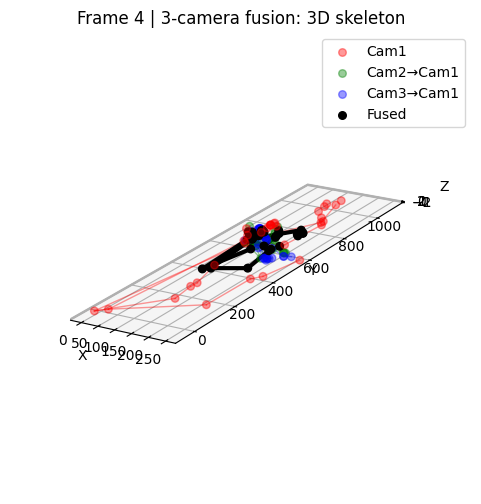

Wrote OFF: fused_frame_4.off


In [21]:
# Load and fuse 3-camera CSVs → per-frame 3D point cloud (prototype)
import glob
import re
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --- Helpers ---
def find_csvs(patterns=("*.csv",)):
    files = []
    for pat in patterns:
        files.extend(sorted(Path(".").glob(pat)))
    # Heuristic: prefer exactly 3 files
    return files[:3]

def extract_landmark_bases(columns):
    bases = set()
    for col in columns:
        m = re.match(r"(.+?)_(x|y|z|confidence)$", col)
        if m:
            bases.add(m.group(1))
    # Filter to common bases that at least have x and y
    bases = [b for b in sorted(bases) if f"{b}_x" in columns and f"{b}_y" in columns]
    return bases

def row_for_frame(df, frame_number=None):
    if frame_number is not None and "frame_number" in df.columns:
        sub = df[df["frame_number"] == frame_number]
        if len(sub):
            return sub.iloc[0]
    # fallback: earliest row
    return df.iloc[0]

def build_points(row, bases):
    points = []
    confs = []
    for b in bases:
        x = row.get(f"{b}_x", np.nan)
        y = row.get(f"{b}_y", np.nan)
        z = row.get(f"{b}_z", 0.0)
        c = row.get(f"{b}_confidence", 1.0)
        points.append([x, y, z])
        confs.append(c)
    pts = np.array(points, dtype=float)
    conf = np.array(confs, dtype=float)
    mask = np.isfinite(pts).all(axis=1)
    return pts, conf, mask

def umeyama_alignment(src, dst, with_scale=True):
    # src, dst: (N,3)
    src = np.asarray(src, dtype=float)
    dst = np.asarray(dst, dtype=float)
    assert src.shape == dst.shape
    n = src.shape[0]
    mu_src = src.mean(axis=0)
    mu_dst = dst.mean(axis=0)
    src_c = src - mu_src
    dst_c = dst - mu_dst
    cov = (dst_c.T @ src_c) / n
    U, S, Vt = np.linalg.svd(cov)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = U @ Vt
    if with_scale:
        var_src = (src_c ** 2).sum() / n
        s = (S.sum() / var_src) if var_src > 1e-12 else 1.0
    else:
        s = 1.0
    t = mu_dst - s * R @ mu_src
    return s, R, t

def apply_transform(pts, s, R, t):
    return (s * (R @ pts.T)).T + t

# --- Load CSVs ---
csv_files = find_csvs()
print(f"Found CSVs: {[str(p) for p in csv_files]}")

dfs = [pd.read_csv(p) for p in csv_files]
# Ensure numeric
for i in range(len(dfs)):
    dfs[i] = dfs[i].apply(pd.to_numeric, errors='ignore')

# Infer common frames
common_frames = None
if all("frame_number" in df.columns for df in dfs):
    frame_sets = [set(df["frame_number"].unique()) for df in dfs]
    common_frames = sorted(set.intersection(*frame_sets))
    print(f"Common frames across CSVs: {len(common_frames)}")

# Pick a test frame (start from frame 4 if available)
start_frame = 4
if common_frames:
    candidates = [f for f in common_frames if int(f) >= start_frame]
    test_frame = candidates[0] if len(candidates) else common_frames[-1]
else:
    test_frame = None
print(f"Using test_frame={test_frame}")

# Extract bases from first CSV
bases = extract_landmark_bases(dfs[0].columns)
print(f"Detected {len(bases)} landmarks: {bases[:10]}{' ...' if len(bases)>10 else ''}")

rows = [row_for_frame(df, test_frame) for df in dfs]
pts = []
confs = []
masks = []
for r in rows:
    p, c, m = build_points(r, bases)
    pts.append(p)
    confs.append(c)
    masks.append(m)

# Keep only landmarks present in all 3
mask_all = masks[0] & masks[1] & masks[2]
pts = [p[mask_all] for p in pts]
confs = [c[mask_all] for c in confs]
sel_bases = [b for i, b in enumerate(bases) if mask_all[i]]
print(f"Using {len(sel_bases)} common landmarks")

if len(sel_bases) < 6:
    raise RuntimeError("Not enough common landmarks to align (need >= 6)")

# Align cam2 and cam3 to cam1 using similarity (scale+rotation+translation)
ref = pts[0]
s2, R2, t2 = umeyama_alignment(pts[1], ref, with_scale=True)
s3, R3, t3 = umeyama_alignment(pts[2], ref, with_scale=True)

pts_aligned = [ref,
               apply_transform(pts[1], s=s2, R=R2, t=t2),
               apply_transform(pts[2], s=s3, R=R3, t=t3)]

# Confidence-weighted fusion
weights = [np.clip(c, 1e-3, 1.0) for c in confs]
Wsum = weights[0][:, None] + weights[1][:, None] + weights[2][:, None]
fused = (pts_aligned[0] * weights[0][:, None] +
         pts_aligned[1] * weights[1][:, None] +
         pts_aligned[2] * weights[2][:, None]) / Wsum

print("Sample fused coordinates (first 5):")
print(np.round(fused[:5], 3))

# --- Visualization (3D skeleton) ---
# Define a simple MediaPipe-like skeleton (only common joints)
skel_pairs = [
    ("left_shoulder", "right_shoulder"),
    ("left_hip", "right_hip"),
    ("left_shoulder", "left_elbow"), ("left_elbow", "left_wrist"),
    ("right_shoulder", "right_elbow"), ("right_elbow", "right_wrist"),
    ("left_shoulder", "left_hip"), ("right_shoulder", "right_hip"),
    ("left_hip", "left_knee"), ("left_knee", "left_ankle"), ("left_ankle", "left_heel"), ("left_heel", "left_foot_index"),
    ("right_hip", "right_knee"), ("right_knee", "right_ankle"), ("right_ankle", "right_heel"), ("right_heel", "right_foot_index"),
    ("nose", "left_eye"), ("nose", "right_eye"), ("left_eye", "left_ear"), ("right_eye", "right_ear")
]

name_to_idx = {name: i for i, name in enumerate(sel_bases)}

def draw_skeleton(ax, pts, color='k', lw=2, alpha=1.0, label=None):
    # points: (N,3) in order of sel_bases
    if label:
        ax.scatter(*pts.T, c=color, s=30, alpha=alpha, label=label)
    else:
        ax.scatter(*pts.T, c=color, s=30, alpha=alpha)
    for a, b in skel_pairs:
        ia = name_to_idx.get(a)
        ib = name_to_idx.get(b)
        if ia is None or ib is None:
            continue
        pa = pts[ia]
        pb = pts[ib]
        if np.all(np.isfinite(pa)) and np.all(np.isfinite(pb)):
            ax.plot([pa[0], pb[0]], [pa[1], pb[1]], [pa[2], pb[2]], color=color, lw=lw, alpha=alpha)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
# Draw per-camera aligned skeletons (faint)
draw_skeleton(ax, ref, color='r', lw=1, alpha=0.4, label='Cam1')
draw_skeleton(ax, pts_aligned[1], color='g', lw=1, alpha=0.4, label='Cam2→Cam1')
draw_skeleton(ax, pts_aligned[2], color='b', lw=1, alpha=0.4, label='Cam3→Cam1')
# Draw fused skeleton (bold)
draw_skeleton(ax, fused, color='k', lw=3, alpha=1.0, label='Fused')

ax.set_title(f"Frame {test_frame} | 3-camera fusion: 3D skeleton")
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.legend(loc='best')

# Enforce equal aspect so it doesn't look flat
all_pts = np.vstack([ref, pts_aligned[1], pts_aligned[2], fused])
mins = all_pts.min(axis=0)
maxs = all_pts.max(axis=0)
ranges = np.maximum(maxs - mins, 1e-6)
ax.set_box_aspect(ranges)
ax.view_init(elev=20, azim=-60)
plt.show()

# --- Export OFF ---
def write_off(path, vertices):
    V = np.asarray(vertices, dtype=float)
    with open(path, 'w') as f:
        f.write("OFF\n")
        f.write(f"{len(V)} 0 0\n")
        for v in V:
            f.write(f"{v[0]} {v[1]} {v[2]}\n")

out_path = Path(f"fused_frame_{test_frame if test_frame is not None else 'first'}.off")
write_off(out_path, fused)
print(f"Wrote OFF: {out_path}")


In [6]:
# Interactive 3D skeleton viewer (Plotly + ipywidgets)
import numpy as np
import pandas as pd
from pathlib import Path

# Try importing plotly; if missing, show a gentle message
try:
    import plotly.graph_objects as go
    import plotly.io as pio
    from ipywidgets import interact, IntSlider, FloatSlider, Checkbox
    # Ensure interactive renderer
    # Try robust renderer defaults across environments
    for r in ['plotly_mimetype', 'notebook', 'jupyterlab', 'vscode', 'notebook_connected', 'iframe']:  # last resorts
        try:
            pio.renderers.default = r
            break
        except Exception:
            continue
except Exception as e:
    print("Plotly/ipywidgets not available. Run: pip install plotly ipywidgets")
    raise

# Reusable helpers (trimmed versions)
import re

def load_csvs(paths=None):
    if paths is None:
        paths = sorted(Path(".").glob("*.csv"))[:3]
    dfs = [pd.read_csv(p) for p in paths]
    return dfs, paths


def extract_bases(columns):
    bases = set()
    for col in columns:
        m = re.match(r"(.+?)_(x|y|z|confidence)$", col)
        if m:
            bases.add(m.group(1))
    bases = [b for b in sorted(bases) if f"{b}_x" in columns and f"{b}_y" in columns]
    return bases


def build_points_from_row(row, bases):
    pts = np.array([[row.get(f"{b}_x", np.nan), row.get(f"{b}_y", np.nan), row.get(f"{b}_z", 0.0)] for b in bases], dtype=float)
    conf = np.array([row.get(f"{b}_confidence", 1.0) for b in bases], dtype=float)
    mask = np.isfinite(pts).all(axis=1)
    return pts, conf, mask


def umeyama(src, dst, with_scale=True):
    src = np.asarray(src, float); dst = np.asarray(dst, float)
    n = src.shape[0]
    mu_s, mu_d = src.mean(0), dst.mean(0)
    s_c, d_c = src - mu_s, dst - mu_d
    U, S, Vt = np.linalg.svd((d_c.T @ s_c) / n)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = U @ Vt
    if with_scale:
        var_s = (s_c ** 2).sum() / n
        s = (S.sum() / var_s) if var_s > 1e-12 else 1.0
    else:
        s = 1.0
    t = mu_d - s * R @ mu_s
    return s, R, t


def apply_tf(P, s, R, t):
    return (s * (R @ P.T)).T + t

# Skeleton edges (subset of MediaPipe that is robust across cameras)
skel_pairs = [
    ("left_shoulder", "right_shoulder"),
    ("left_hip", "right_hip"),
    ("left_shoulder", "left_elbow"), ("left_elbow", "left_wrist"),
    ("right_shoulder", "right_elbow"), ("right_elbow", "right_wrist"),
    ("left_shoulder", "left_hip"), ("right_shoulder", "right_hip"),
    ("left_hip", "left_knee"), ("left_knee", "left_ankle"), ("left_ankle", "left_heel"), ("left_heel", "left_foot_index"),
    ("right_hip", "right_knee"), ("right_knee", "right_ankle"), ("right_ankle", "right_heel"), ("right_heel", "right_foot_index"),
    ("nose", "left_eye"), ("nose", "right_eye"), ("left_eye", "left_ear"), ("right_eye", "right_ear")
]

# Load data (reuse dfs if exists)
try:
    dfs  # type: ignore
    _dfs_available = True
except NameError:
    _dfs_available = False

if not _dfs_available:
    dfs, csv_paths = load_csvs()
else:
    csv_paths = []

# Ensure frame_number is numeric and present
for i in range(len(dfs)):
    if "frame_number" in dfs[i].columns:
        dfs[i]["frame_number"] = pd.to_numeric(dfs[i]["frame_number"], errors='coerce').astype('Int64')

# Compute common frames safely and efficiently
if all("frame_number" in df.columns for df in dfs):
    sets = [set(df["frame_number"].dropna().astype(int).unique()) for df in dfs]
    common = sorted(set.intersection(*sets))
else:
    # fallback: use indices
    min_len = min(len(df) for df in dfs)
    common = list(range(min_len))

# Prefer starting from frame 4 and limit total frames for speed
START_MIN = 4
MAX_FRAMES = 300
start_idx = 0
for i, f in enumerate(common):
    if int(f) >= START_MIN:
        start_idx = i
        break
common = common[start_idx:start_idx + MAX_FRAMES] if len(common) > MAX_FRAMES else common
print(f"Interactive viewer using {len(common)} frames starting at frame >= {START_MIN}")

# Build per-DF indexed subset for O(1) frame access
indexed = []
for df in dfs:
    if "frame_number" in df.columns:
        sub = df[df["frame_number"] .isin(common)].copy()
        sub = sub.drop_duplicates("frame_number", keep='first').set_index("frame_number")
        # Ensure all frames present (may drop some if missing)
        indexed.append(sub)
    else:
        indexed.append(df)

bases = extract_bases(dfs[0].columns)

# Precompute a stable reference orientation from the first available frame
ORIENT_R = None

def _compute_reference_orientation():
    global ORIENT_R
    if not common:
        return None
    fnum = int(common[0])
    rows = []
    for df, df_idx in zip(dfs, indexed):
        if "frame_number" in df.columns and fnum in df_idx.index:
            row = df_idx.loc[fnum]
        else:
            row = df.iloc[0]
        rows.append(row)
    # build points
    pts_list, conf_list, mask_list = [], [], []
    for r in rows:
        p, c, m = build_points_from_row(r, bases)
        pts_list.append(p); conf_list.append(c); mask_list.append(m)
    mask_all = mask_list[0]
    for m in mask_list[1:]:
        mask_all &= m
    if mask_all.sum() < 6:
        return None
    sel = np.where(mask_all)[0]
    P1, P2, P3 = pts_list[0][sel], pts_list[1][sel], pts_list[2][sel]
    # align to cam1
    s2, R2, t2 = umeyama(P2, P1, with_scale=True)
    s3, R3, t3 = umeyama(P3, P1, with_scale=True)
    A1 = P1
    A2 = apply_tf(P2, s2, R2, t2)
    A3 = apply_tf(P3, s3, R3, t3)
    # fuse (equal weights ok for orientation)
    F = (A1 + A2 + A3) / 3.0
    # compute PCA rotation
    X = F - F.mean(0)
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    ORIENT_R = Vt
    return ORIENT_R

if ORIENT_R is None:
    _compute_reference_orientation()

# Center/orient for better viewing
def orient_points(pts, name_to_idx):
    # Center at pelvis if available; else centroid
    if "left_hip" in name_to_idx and "right_hip" in name_to_idx:
        pelvis = 0.5 * (pts[name_to_idx["left_hip"]] + pts[name_to_idx["right_hip"]])
    else:
        pelvis = pts.mean(axis=0)
    P = pts - pelvis
    # Use precomputed global orientation for consistency across frames
    global ORIENT_R
    R = ORIENT_R
    if R is None:
        # fallback PCA on this frame
        X = P - P.mean(0)
        U, S, Vt = np.linalg.svd(X, full_matrices=False)
        R = Vt
    P2 = (R @ P.T).T
    return P2

# Build interactive viewer
@interact(frame=IntSlider(min=0, max=max(0, len(common)-1), step=1, value=0, description='frame idx'),
          depth_gain=FloatSlider(min=0.5, max=8.0, step=0.1, value=2.5, description='depth x'),
          elev=FloatSlider(min=-30, max=60, step=1, value=15, description='elev'),
          azim=FloatSlider(min=-180, max=180, step=1, value=-60, description='azim'),
          show_cams=Checkbox(value=True, description='show per-camera'),
          show_fused=Checkbox(value=True, description='show fused'))
def view_frame(frame, depth_gain, elev, azim, show_cams, show_fused):
    if not common:
        return go.Figure(layout_title_text="No common frames found")
    fnum = int(common[frame])
    rows = []
    for df, df_idx in zip(dfs, indexed):
        if "frame_number" in df.columns:
            if fnum not in df_idx.index:
                return go.Figure(layout_title_text=f"Frame {fnum}: missing in one CSV")
            row = df_idx.loc[fnum]
        else:
            row = df.iloc[fnum]
        rows.append(row)

    # Build points for each camera and find common visible landmarks
    pts_list, conf_list, mask_list = [], [], []
    for r in rows:
        p, c, m = build_points_from_row(r, bases)
        pts_list.append(p)
        conf_list.append(c)
        mask_list.append(m)
    mask_all = mask_list[0]
    for m in mask_list[1:]:
        mask_all &= m
    if mask_all.sum() < 6:
        return go.Figure(layout_title_text=f"Frame {fnum}: insufficient common landmarks")

    sel = np.where(mask_all)[0]
    sel_bases = [bases[i] for i in sel]
    name_to_idx = {n: i for i, n in enumerate(sel_bases)}

    P1 = pts_list[0][sel]
    P2 = pts_list[1][sel]
    P3 = pts_list[2][sel]

    s2, R2, t2 = umeyama(P2, P1, with_scale=True)
    s3, R3, t3 = umeyama(P3, P1, with_scale=True)
    A1 = P1
    A2 = apply_tf(P2, s2, R2, t2)
    A3 = apply_tf(P3, s3, R3, t3)

    # Confidence-weighted fusion
    C1 = np.clip(conf_list[0][sel], 1e-3, 1.0)
    C2 = np.clip(conf_list[1][sel], 1e-3, 1.0)
    C3 = np.clip(conf_list[2][sel], 1e-3, 1.0)
    Wsum = (C1 + C2 + C3)[:, None]
    fused = (A1 * C1[:, None] + A2 * C2[:, None] + A3 * C3[:, None]) / Wsum

    # Orient for visualization and amplify depth
    A1v = orient_points(A1, name_to_idx); A1v[:, 2] *= depth_gain
    A2v = orient_points(A2, name_to_idx); A2v[:, 2] *= depth_gain
    A3v = orient_points(A3, name_to_idx); A3v[:, 2] *= depth_gain
    Fv  = orient_points(fused, name_to_idx); Fv[:, 2] *= depth_gain

    def traces_for_skel(pts, color, name):
        # points
        traces = [go.Scatter3d(x=pts[:,0], y=pts[:,1], z=pts[:,2], mode='markers',
                               marker=dict(size=4, color=color), name=name, opacity=0.7)]
        # bones
        for a, b in skel_pairs:
            ia = name_to_idx.get(a); ib = name_to_idx.get(b)
            if ia is None or ib is None:
                continue
            pa, pb = pts[ia], pts[ib]
            if np.all(np.isfinite(pa)) and np.all(np.isfinite(pb)):
                traces.append(go.Scatter3d(x=[pa[0], pb[0]], y=[pa[1], pb[1]], z=[pa[2], pb[2]],
                                           mode='lines', line=dict(color=color, width=6), showlegend=False))
        return traces

    traces = []
    if show_cams:
        traces += traces_for_skel(A1v, '#d62728', 'Cam1')
        traces += traces_for_skel(A2v, '#2ca02c', 'Cam2→Cam1')
        traces += traces_for_skel(A3v, '#1f77b4', 'Cam3→Cam1')
    if show_fused:
        traces += traces_for_skel(Fv, '#000000', 'Fused')

    fig = go.Figure(data=traces)

    # Camera orientation from sliders
    import math
    r = 1.8
    elev_r = math.radians(float(elev))
    azim_r = math.radians(float(azim))
    eye = dict(
        x=r * math.cos(elev_r) * math.cos(azim_r),
        y=r * math.cos(elev_r) * math.sin(azim_r),
        z=r * math.sin(elev_r),
    )

    # Add a translucent ground plane at current min Z
    allp = np.vstack([A1v, A2v, A3v, Fv])
    xmin, ymin, zmin = allp.min(axis=0)
    xmax, ymax, zmax = allp.max(axis=0)
    fig.add_trace(go.Surface(
        x=np.array([[xmin, xmax], [xmin, xmax]]),
        y=np.array([[ymin, ymin], [ymax, ymax]]),
        z=np.array([[zmin, zmin], [zmin, zmin]]),
        showscale=False,
        opacity=0.15,
        colorscale=[[0, "#cccccc"], [1, "#cccccc"]],
        hoverinfo="skip",
        name="ground",
    ))

    fig.update_layout(
        title=f"Frame {fnum} | 3-camera fusion (interactive 3D)",
        scene=dict(
            xaxis=dict(title='X', showbackground=True, backgroundcolor='rgb(240,240,240)'),
            yaxis=dict(title='Y', showbackground=True, backgroundcolor='rgb(240,240,240)'),
            zaxis=dict(title='Z', showbackground=True, backgroundcolor='rgb(240,240,240)'),
            aspectmode='data',
            camera=dict(eye=eye)
        ),
        # Persist camera/interaction state when controls change
        uirevision='hold-camera',
        margin=dict(l=0, r=0, t=40, b=0)
    )
    return fig


Interactive viewer using 300 frames starting at frame >= 4


interactive(children=(IntSlider(value=0, description='frame idx', max=299), FloatSlider(value=2.5, description…

In [8]:
# Persistent 3D viewer (FigureWidget) with camera lock, zoom, and depth autoscale
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
from ipywidgets import VBox, HBox, IntSlider, FloatSlider, Checkbox
from IPython.display import display

# Reuse previously prepared dfs/indexed/common/bases
try:
    dfs, indexed, common, bases  # type: ignore
except NameError:
    # Fallback minimal load
    dfs = [pd.read_csv(p) for p in sorted(Path('.').glob('*.csv'))[:3]]
    for i in range(len(dfs)):
        if 'frame_number' in dfs[i].columns:
            dfs[i]['frame_number'] = pd.to_numeric(dfs[i]['frame_number'], errors='coerce').astype('Int64')
    sets = [set(df['frame_number'].dropna().astype(int).unique()) for df in dfs if 'frame_number' in df.columns]
    common = sorted(set.intersection(*sets)) if sets else list(range(min(len(df) for df in dfs)))
    indexed = []
    for df in dfs:
        if 'frame_number' in df.columns:
            sub = df[df['frame_number'].isin(common)].copy().drop_duplicates('frame_number', keep='first').set_index('frame_number')
            indexed.append(sub)
        else:
            indexed.append(df)
    import re
    def _extract_bases(columns):
        b = set()
        for col in columns:
            m = re.match(r"(.+?)_(x|y|z|confidence)$", col)
            if m:
                b.add(m.group(1))
        return [v for v in sorted(b) if f"{v}_x" in columns and f"{v}_y" in columns]
    bases = _extract_bases(dfs[0].columns)

# Helpers
import re

def build_points_from_row(row, bases):
    pts = np.array([[row.get(f"{b}_x", np.nan), row.get(f"{b}_y", np.nan), row.get(f"{b}_z", 0.0)] for b in bases], dtype=float)
    conf = np.array([row.get(f"{b}_confidence", 1.0) for b in bases], dtype=float)
    mask = np.isfinite(pts).all(axis=1)
    return pts, conf, mask


def umeyama(src, dst):
    src = np.asarray(src, float); dst = np.asarray(dst, float)
    n = src.shape[0]
    mu_s, mu_d = src.mean(0), dst.mean(0)
    s_c, d_c = src - mu_s, dst - mu_d
    U, S, Vt = np.linalg.svd((d_c.T @ s_c) / n)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = U @ Vt
    var_s = (s_c ** 2).sum() / n
    s = (S.sum() / var_s) if var_s > 1e-12 else 1.0
    t = mu_d - s * R @ mu_s
    return s, R, t


def apply_tf(P, s, R, t):
    return (s * (R @ P.T)).T + t

# Skeleton edges
skel_pairs = [
    ("left_shoulder", "right_shoulder"), ("left_hip", "right_hip"),
    ("left_shoulder", "left_elbow"), ("left_elbow", "left_wrist"),
    ("right_shoulder", "right_elbow"), ("right_elbow", "right_wrist"),
    ("left_shoulder", "left_hip"), ("right_shoulder", "right_hip"),
    ("left_hip", "left_knee"), ("left_knee", "left_ankle"), ("left_ankle", "left_heel"), ("left_heel", "left_foot_index"),
    ("right_hip", "right_knee"), ("right_knee", "right_ankle"), ("right_ankle", "right_heel"), ("right_heel", "right_foot_index"),
    ("nose", "left_eye"), ("nose", "right_eye"), ("left_eye", "left_ear"), ("right_eye", "right_ear")
]

# Global camera state (persist across frame updates)
camera_state = dict(eye=dict(x=3.5, y=3.0, z=2.0))

# Controls
frame_candidates = [int(f) for f in common if int(f) >= 4] or [int(f) for f in common]
frame_slider = IntSlider(min=0, max=max(0, len(frame_candidates)-1), step=1, value=0, description='frame')
zoom_slider = FloatSlider(min=0.5, max=10.0, step=0.1, value=4.0, description='zoom')
depth_slider = FloatSlider(min=0.5, max=10.0, step=0.1, value=4.0, description='depth')
lock_cam = Checkbox(value=True, description='lock camera')

# FigureWidget
fig_fw = go.FigureWidget()
fig_fw.update_layout(
    title="3-camera fusion (persistent 3D viewer)",
    scene=dict(
        aspectmode='data',
        xaxis=dict(title='X', showbackground=True, backgroundcolor='rgb(240,240,240)'),
        yaxis=dict(title='Y', showbackground=True, backgroundcolor='rgb(240,240,240)'),
        zaxis=dict(title='Z', showbackground=True, backgroundcolor='rgb(240,240,240)')
    ),
    uirevision='persist',
)


# Prepare traces (per-cam + fused)
colors = dict(cam1='#d62728', cam2='#2ca02c', cam3='#1f77b4', fused='#000000')
for _ in range(4):
    # points
    fig_fw.add_scatter3d(mode='markers', marker=dict(size=4), name='pts')
    # bones placeholder (multi-segment line)
    fig_fw.add_scatter3d(mode='lines', line=dict(width=6), showlegend=False, name='bones')

# Utility to build skeleton line segments from points and sel_bases
def skeleton_segments(pts, name_to_idx):
    xs, ys, zs = [], [], []
    for a, b in skel_pairs:
        ia = name_to_idx.get(a); ib = name_to_idx.get(b)
        if ia is None or ib is None:
            continue
        pa, pb = pts[ia], pts[ib]
        if np.all(np.isfinite(pa)) and np.all(np.isfinite(pb)):
            xs += [pa[0], pb[0], None]
            ys += [pa[1], pb[1], None]
            zs += [pa[2], pb[2], None]
    return xs, ys, zs

# Update function
def update_view(*_):
    idx = int(frame_slider.value)
    fnum = frame_candidates[idx]
    # rows per df
    rows = []
    for df, df_idx in zip(dfs, indexed):
        if 'frame_number' in df.columns:
            if fnum not in df_idx.index:
                fig_fw.layout.scene.camera = camera_state
                return
            row = df_idx.loc[fnum]
        else:
            row = df.iloc[fnum]
        rows.append(row)

    pts_list, conf_list, mask_list = [], [], []
    for r in rows:
        p, c, m = build_points_from_row(r, bases)
        pts_list.append(p); conf_list.append(c); mask_list.append(m)
    mask_all = mask_list[0]
    for m in mask_list[1:]:
        mask_all &= m
    sel = np.where(mask_all)[0]
    if len(sel) < 6:
        fig_fw.layout.scene.camera = camera_state
        return

    sel_bases = [bases[i] for i in sel]
    name_to_idx = {n: i for i, n in enumerate(sel_bases)}

    P1, P2, P3 = pts_list[0][sel], pts_list[1][sel], pts_list[2][sel]
    s2, R2, t2 = umeyama(P2, P1)
    s3, R3, t3 = umeyama(P3, P1)
    A1 = P1
    A2 = apply_tf(P2, s2, R2, t2)
    A3 = apply_tf(P3, s3, R3, t3)

    C1 = np.clip(conf_list[0][sel], 1e-3, 1.0)
    C2 = np.clip(conf_list[1][sel], 1e-3, 1.0)
    C3 = np.clip(conf_list[2][sel], 1e-3, 1.0)
    Wsum = (C1 + C2 + C3)[:, None]
    F = (A1 * C1[:, None] + A2 * C2[:, None] + A3 * C3[:, None]) / Wsum

    # Depth autoscale: make Z variance comparable to XY
    xy_std = np.std(F[:, :2])
    z_std = max(np.std(F[:, 2]), 1e-6)
    z_scale = (xy_std / z_std) * float(depth_slider.value)

    def orient_and_scale(P):
        # center pelvis if available
        if 'left_hip' in name_to_idx and 'right_hip' in name_to_idx:
            pelvis = 0.5 * (P[name_to_idx['left_hip']] + P[name_to_idx['right_hip']])
        else:
            pelvis = P.mean(0)
        Q = P - pelvis
        # Apply global ORIENT_R if available
        global ORIENT_R
        R = ORIENT_R
        if R is None:
            X = Q - Q.mean(0)
            U, S, Vt = np.linalg.svd(X, full_matrices=False)
            R = Vt
        Q2 = (R @ Q.T).T
        Q2[:, 2] *= z_scale
        return Q2

    A1v, A2v, A3v, Fv = orient_and_scale(A1), orient_and_scale(A2), orient_and_scale(A3), orient_and_scale(F)

    # Compute ranges and camera eye distance
    allp = np.vstack([A1v, A2v, A3v, Fv])
    mins = allp.min(0); maxs = allp.max(0)
    center = (mins + maxs) / 2.0
    size = (maxs - mins).max()
    # Update axes ranges for stable view
    pad = 0.2 * size
    xr = [center[0] - size/2 - pad, center[0] + size/2 + pad]
    yr = [center[1] - size/2 - pad, center[1] + size/2 + pad]
    zr = [center[2] - size/2 - pad, center[2] + size/2 + pad]

    # Update traces: order -> cam1 pts, cam1 bones, cam2 pts, cam2 bones, cam3 pts, cam3 bones, fused pts, fused bones
    sets = [(A1v, colors['cam1']), (A2v, colors['cam2']), (A3v, colors['cam3']), (Fv, colors['fused'])]
    names = ['Cam1','Cam2→Cam1','Cam3→Cam1','Fused']
    for i, ((Pset, col), nm) in enumerate(zip(sets, names)):
        # points
        fig_fw.data[i*2].x = Pset[:, 0]
        fig_fw.data[i*2].y = Pset[:, 1]
        fig_fw.data[i*2].z = Pset[:, 2]
        fig_fw.data[i*2].marker.color = col
        fig_fw.data[i*2].name = nm
        # bones
        xs, ys, zs = skeleton_segments(Pset, name_to_idx)
        fig_fw.data[i*2+1].x = xs
        fig_fw.data[i*2+1].y = ys
        fig_fw.data[i*2+1].z = zs
        fig_fw.data[i*2+1].line.color = col

    # Apply ranges
    fig_fw.layout.scene.xaxis.range = xr
    fig_fw.layout.scene.yaxis.range = yr
    fig_fw.layout.scene.zaxis.range = zr

    # Camera application: if locked, keep last; else compute from zoom slider preserving direction
    if not lock_cam.value:
        eye = camera_state.get('eye', dict(x=3.5, y=3.0, z=2.0))
        r = float(zoom_slider.value)
        v = np.array([eye.get('x', 1.0), eye.get('y', 0.8), eye.get('z', 0.5)], dtype=float)
        n = np.linalg.norm(v) or 1.0
        v = v / n * r
        camera_state['eye'] = dict(x=float(v[0]), y=float(v[1]), z=float(v[2]))
    fig_fw.layout.scene.camera = camera_state

# Wire controls
frame_slider.observe(update_view, names='value')
zoom_slider.observe(update_view, names='value')
depth_slider.observe(update_view, names='value')
lock_cam.observe(update_view, names='value')

# Initial render
update_view()

display(VBox([HBox([frame_slider, zoom_slider, depth_slider, lock_cam]), fig_fw]))


In [43]:
# Extract 2D pixel landmarks + MediaPipe "world" landmarks from MP4s → *_world.csv
# Uses MediaPipe Tasks (IMAGE mode) to avoid Windows timestamp bugs.

import sys, subprocess, urllib.request
from pathlib import Path
import numpy as np
import csv

# --- Ensure deps ---
try:
    import mediapipe as mp
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "mediapipe"])
    import mediapipe as mp

try:
    import cv2
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "opencv-python"])
    import cv2

# Reduce OpenCV thread churn on some Windows setups
try:
    cv2.setNumThreads(0)
except Exception:
    pass

# --- MediaPipe Tasks imports ---
PythonTasks = mp.tasks
Vision = mp.tasks.vision
BaseOptions = PythonTasks.BaseOptions
PoseLandmarker = Vision.PoseLandmarker
PoseLandmarkerOptions = Vision.PoseLandmarkerOptions
VisionRunningMode = Vision.RunningMode
Image = mp.Image
ImageFormat = mp.ImageFormat

# --- Config ---
MAX_WIDTH = 1280
INCLUDE_VISIBILITY = False           # set True if your build exposes per-joint visibility
MODEL_DIR = Path("models"); MODEL_DIR.mkdir(exist_ok=True)
MODEL_URL = ("https://storage.googleapis.com/mediapipe-models/pose_landmarker/"
             "pose_landmarker_full/float16/1/pose_landmarker_full.task")
MODEL_PATH = MODEL_DIR / "pose_landmarker_full.task"

# Optional manual rotation for phone footage: None | "cw" | "ccw" | "180"
ROTATE = None

LANDMARK_NAMES = [
    "nose","left_eye_inner","left_eye","left_eye_outer","right_eye_inner","right_eye","right_eye_outer",
    "left_ear","right_ear","mouth_left","mouth_right","left_shoulder","right_shoulder","left_elbow","right_elbow",
    "left_wrist","right_wrist","left_pinky","right_pinky","left_index","right_index","left_thumb","right_thumb",
    "left_hip","right_hip","left_knee","right_knee","left_ankle","right_ankle","left_heel","right_heel",
    "left_foot_index","right_foot_index"
]

# Your three clips in the working directory
target_names = {
    "003_20250905_184138-3-2min.mp4",
    "002_20250802_044544-3-2min.mp4",
    "001_20250801_221250-3-2min.mp4",
}

def ensure_model_bytes() -> bytes:
    if not MODEL_PATH.exists():
        print(f"Downloading model → {MODEL_PATH} ...")
        urllib.request.urlretrieve(MODEL_URL, MODEL_PATH.as_posix())
        print("Model downloaded.")
    with open(MODEL_PATH, "rb") as f:
        return f.read()

def maybe_rotate_bgr(frame_bgr):
    if ROTATE is None: return frame_bgr
    if ROTATE == "cw":  return cv2.rotate(frame_bgr, cv2.ROTATE_90_CLOCKWISE)
    if ROTATE == "ccw": return cv2.rotate(frame_bgr, cv2.ROTATE_90_COUNTERCLOCKWISE)
    if ROTATE == "180": return cv2.rotate(frame_bgr, cv2.ROTATE_180)
    return frame_bgr

def prepare_rgb(frame_bgr, max_width=MAX_WIDTH):
    if frame_bgr is None: return None
    frame_bgr = maybe_rotate_bgr(frame_bgr)
    # BGR/BGRA/GRAY -> RGB
    if frame_bgr.ndim == 2:
        image_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_GRAY2RGB)
    elif frame_bgr.shape[2] == 4:
        image_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGRA2RGB)
    else:
        image_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    # Downscale for speed
    h, w = image_rgb.shape[:2]
    if w > max_width:
        scale = float(max_width) / float(w)
        image_rgb = cv2.resize(image_rgb, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
        h, w = image_rgb.shape[:2]
    # Contiguous uint8
    if image_rgb.dtype != np.uint8: image_rgb = image_rgb.astype(np.uint8)
    if not image_rgb.flags["C_CONTIGUOUS"]: image_rgb = np.ascontiguousarray(image_rgb)
    return image_rgb, (w, h)

def build_header(include_visibility=False, include_2d=True):
    header = ["video","fps","frame_number","timestamp","width","height"]
    for name in LANDMARK_NAMES:
        if include_2d:
            header += [f"{name}_u", f"{name}_v"]  # pixel coords (u=x_px, v=y_px)
        header += [f"{name}_x", f"{name}_y", f"{name}_z"]  # MediaPipe "world"
        if include_visibility:
            header += [f"{name}_confidence"]
    return header

def process_video_to_world_csv(vid_path: Path, model_bytes: bytes):
    out_csv = vid_path.with_name(vid_path.stem + "_world.csv")
    print(f"Processing {vid_path.name} → {out_csv.name}")

    cap = cv2.VideoCapture(str(vid_path))
    if not cap.isOpened():
        print(f"  Warning: could not open {vid_path.name}")
        return

    # fps & timestamps only used for reporting (IMAGE mode doesn’t require ms)
    fps = cap.get(cv2.CAP_PROP_FPS)
    if not fps or (isinstance(fps, float) and (np.isnan(fps) or fps <= 0)): fps = 30.0

    options = PoseLandmarkerOptions(
        base_options=BaseOptions(model_asset_buffer=model_bytes),
        running_mode=Vision.RunningMode.IMAGE,   # <- IMAGE mode: simpler, no timestamps
        num_poses=1,
        min_pose_detection_confidence=0.5,
        min_pose_presence_confidence=0.5,
        min_tracking_confidence=0.5,
        output_segmentation_masks=False
    )

    header = build_header(include_visibility=INCLUDE_VISIBILITY, include_2d=True)

    with PoseLandmarker.create_from_options(options) as landmarker, \
         open(out_csv, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writeheader()

        frame_idx = 0
        while True:
            ok, frame_bgr = cap.read()
            if not ok: break

            prep = prepare_rgb(frame_bgr)
            if prep is None: break
            image_rgb, (W, H) = prep

            mp_image = Image(image_format=ImageFormat.SRGB, data=image_rgb)
            result = landmarker.detect(mp_image)  # IMAGE mode call

            # try to read backend timestamp (ms); fallback to frame/fps
            pos_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
            timestamp_s = float(pos_ms/1000.0) if isinstance(pos_ms, (int,float)) and not np.isnan(pos_ms) else float(frame_idx/float(fps))

            row = {"video": vid_path.name, "fps": float(fps), "frame_number": int(frame_idx),
                   "timestamp": timestamp_s, "width": int(W), "height": int(H)}

            # Fill detections
            if (result.pose_world_landmarks and len(result.pose_world_landmarks) > 0
                and result.pose_landmarks and len(result.pose_landmarks) > 0):
                wls = result.pose_world_landmarks[0]
                l2d = result.pose_landmarks[0]
                vis = None
                if INCLUDE_VISIBILITY:
                    try: vis = [getattr(lm, "visibility") for lm in wls]
                    except Exception: vis = None

                for i, name in enumerate(LANDMARK_NAMES):
                    # 2D pixel (u,v)
                    n2 = l2d[i]
                    row[f"{name}_u"] = float(n2.x * W)
                    row[f"{name}_v"] = float(n2.y * H)
                    # "World" coords (monocular, meters; not true multi-cam world)
                    n3 = wls[i]
                    row[f"{name}_x"] = float(n3.x)
                    row[f"{name}_y"] = float(n3.y)
                    row[f"{name}_z"] = float(n3.z)
                    if INCLUDE_VISIBILITY:
                        row[f"{name}_confidence"] = float(vis[i] if vis is not None else 0.0)
            else:
                # No detection → NaNs
                for name in LANDMARK_NAMES:
                    row[f"{name}_u"] = row[f"{name}_v"] = np.nan
                    row[f"{name}_x"] = row[f"{name}_y"] = row[f"{name}_z"] = np.nan
                    if INCLUDE_VISIBILITY:
                        row[f"{name}_confidence"] = 0.0

            writer.writerow(row)
            frame_idx += 1
            if frame_idx % 300 == 0:
                print(f"  ...processed {frame_idx} frames")

    cap.release()
    print(f"  Wrote rows to {out_csv.name}")

def main():
    videos = [Path(n) for n in sorted(target_names) if Path(n).exists()]
    missing = [n for n in sorted(target_names) if not Path(n).exists()]
    print(f"Found target videos: {[p.name for p in videos]}")
    if missing: print(f"Warning: missing videos: {missing}")
    if not videos:
        print("No target videos found next to this script.")
        return

    model_bytes = ensure_model_bytes()
    for vid in videos:
        process_video_to_world_csv(vid, model_bytes)

if __name__ == "__main__":
    main()


Found target videos: ['001_20250801_221250-3-2min.mp4', '002_20250802_044544-3-2min.mp4', '003_20250905_184138-3-2min.mp4']
Processing 001_20250801_221250-3-2min.mp4 → 001_20250801_221250-3-2min_world.csv


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. mediapipe.python._framework_bindings.image.Image(image_format: mediapipe::ImageFormat_Format, data: numpy.ndarray[numpy.uint8])
    2. mediapipe.python._framework_bindings.image.Image(image_format: mediapipe::ImageFormat_Format, data: numpy.ndarray[numpy.uint16])
    3. mediapipe.python._framework_bindings.image.Image(image_format: mediapipe::ImageFormat_Format, data: numpy.ndarray[numpy.float32])

Invoked with: kwargs: image_format=<ImageFormat.SRGB: 1>, data=array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [231, 235, 250],
        [231, 235, 250],
        [231, 235, 250]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [231, 235, 250],
        [231, 235, 250],
        [231, 235, 250]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [231, 235, 250],
        [231, 235, 250],
        [231, 235, 250]],

       ...,

       [[219, 194, 177],
        [219, 194, 177],
        [219, 194, 177],
        ...,
        [171, 125, 107],
        [171, 125, 107],
        [171, 125, 107]],

       [[219, 194, 177],
        [219, 194, 177],
        [219, 194, 177],
        ...,
        [171, 125, 107],
        [171, 125, 107],
        [171, 125, 107]],

       [[219, 194, 177],
        [219, 194, 177],
        [219, 194, 177],
        ...,
        [171, 125, 107],
        [171, 125, 107],
        [171, 125, 107]]], dtype=uint8)

In [25]:
# World-based fused 3D skeleton viewer (uses *_world.csv only)
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
from ipywidgets import VBox, HBox, IntSlider, FloatSlider, Checkbox
from IPython.display import display

world_csvs = sorted(Path('.').glob('*_world.csv'))
print(f'World CSVs: {[p.name for p in world_csvs]}')

if len(world_csvs) >= 3:
    dfs_w = [pd.read_csv(p) for p in world_csvs[:3]]
else:
    dfs_w = [pd.read_csv(world_csvs[0])] if world_csvs else []

if not dfs_w:
    print('No world CSVs found. Run the extraction cell above first.')
else:
    for i in range(len(dfs_w)):
        if 'frame_number' in dfs_w[i].columns:
            dfs_w[i]['frame_number'] = pd.to_numeric(dfs_w[i]['frame_number'], errors='coerce').astype('Int64')

    # Common frames
    if len(dfs_w) > 1:
        sets = [set(df['frame_number'].dropna().astype(int).unique()) for df in dfs_w]
        common_w = sorted(set.intersection(*sets))
    else:
        common_w = list(dfs_w[0]['frame_number'].dropna().astype(int).unique())

    # Landmark bases (world columns are same names)
    import re
    def extract_bases(cols):
        b = set()
        for c in cols:
            m = re.match(r'(.+?)_(x|y|z|confidence)$', c)
            if m:
                b.add(m.group(1))
        return [v for v in sorted(b) if f'{v}_x' in cols and f'{v}_y' in cols and f'{v}_z' in cols]

    bases_w = extract_bases(dfs_w[0].columns)

    # Controls
    frame_candidates = [int(f) for f in common_w if int(f) >= 4] or [int(f) for f in common_w]
    frame_slider = IntSlider(min=0, max=max(0, len(frame_candidates)-1), step=1, value=0, description='frame')
    lock_cam = Checkbox(value=True, description='lock camera')
    zoom_slider = FloatSlider(min=0.5, max=10.0, step=0.1, value=4.0, description='zoom')

    fig = go.FigureWidget()
    fig.update_layout(scene=dict(aspectmode='data'), uirevision='persist')
    camera_state = dict(eye=dict(x=4.0, y=3.5, z=2.5))

    # Prepare traces: fused only (world coords already metric)
    fig.add_scatter3d(mode='markers', marker=dict(size=4, color='#000'), name='Fused')
    fig.add_scatter3d(mode='lines', line=dict(width=6, color='#444'), showlegend=False)

    skel_pairs = [
        ('left_shoulder','right_shoulder'),('left_hip','right_hip'),
        ('left_shoulder','left_elbow'),('left_elbow','left_wrist'),
        ('right_shoulder','right_elbow'),('right_elbow','right_wrist'),
        ('left_shoulder','left_hip'),('right_shoulder','right_hip'),
        ('left_hip','left_knee'),('left_knee','left_ankle'),('left_ankle','left_heel'),('left_heel','left_foot_index'),
        ('right_hip','right_knee'),('right_knee','right_ankle'),('right_ankle','right_heel'),('right_heel','right_foot_index'),
        ('nose','left_eye'),('nose','right_eye'),('left_eye','left_ear'),('right_eye','right_ear')
    ]

    indexed_w = []
    for df in dfs_w:
        sub = df[df['frame_number'].isin(frame_candidates)].drop_duplicates('frame_number', keep='first').set_index('frame_number')
        indexed_w.append(sub)

    def update_world(*_):
        fnum = frame_candidates[int(frame_slider.value)]
        rows = [df.loc[fnum] for df in indexed_w]
        # Build fused by simple averaging (same world frame)
        pts_sets = []
        for r in rows:
            P = np.array([[r.get(f'{b}_x', np.nan), r.get(f'{b}_y', np.nan), r.get(f'{b}_z', np.nan)] for b in bases_w], float)
            pts_sets.append(P)
        P = np.nanmean(np.stack(pts_sets, axis=0), axis=0)

        name_to_idx = {n:i for i,n in enumerate(bases_w)}
        # center pelvis for nicer view
        if 'left_hip' in name_to_idx and 'right_hip' in name_to_idx:
            pelvis = 0.5*(P[name_to_idx['left_hip']]+P[name_to_idx['right_hip']])
        else:
            pelvis = np.nanmean(P, axis=0)
        P2 = P - pelvis

        # Update points
        fig.data[0].x = P2[:,0]
        fig.data[0].y = P2[:,1]
        fig.data[0].z = P2[:,2]
        # Bones
        xs, ys, zs = [], [], []
        for a,b in skel_pairs:
            ia, ib = name_to_idx.get(a), name_to_idx.get(b)
            if ia is None or ib is None: continue
            pa, pb = P2[ia], P2[ib]
            if np.all(np.isfinite(pa)) and np.all(np.isfinite(pb)):
                xs += [pa[0], pb[0], None]
                ys += [pa[1], pb[1], None]
                zs += [pa[2], pb[2], None]
        fig.data[1].x = xs; fig.data[1].y = ys; fig.data[1].z = zs

        # Axes ranges and camera
        mins = np.nanmin(P2, axis=0); maxs = np.nanmax(P2, axis=0)
        size = float(np.nanmax(maxs - mins))
        pad = 0.2*size if size>0 else 1.0
        center = (mins+maxs)/2
        xr = [center[0]-size/2-pad, center[0]+size/2+pad]
        yr = [center[1]-size/2-pad, center[1]+size/2+pad]
        zr = [center[2]-size/2-pad, center[2]+size/2+pad]
        fig.layout.scene.xaxis.range = xr
        fig.layout.scene.yaxis.range = yr
        fig.layout.scene.zaxis.range = zr

        if not lock_cam.value:
            eye = camera_state.get('eye', dict(x=4.0,y=3.5,z=2.5))
            r = float(zoom_slider.value)
            v = np.array([eye['x'], eye['y'], eye['z']], float)
            n = np.linalg.norm(v) or 1.0
            v = v/n*r
            camera_state['eye'] = dict(x=float(v[0]), y=float(v[1]), z=float(v[2]))
        fig.layout.scene.camera = camera_state

    frame_slider.observe(update_world, names='value')
    zoom_slider.observe(update_world, names='value')
    lock_cam.observe(update_world, names='value')
    update_world()

    display(VBox([HBox([frame_slider, zoom_slider, lock_cam]), fig]))


World CSVs: []
No world CSVs found. Run the extraction cell above first.
